In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_2780\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The CNCB Dataset

Dataset of the CT images and metadata are constructed from cohorts from the China Consortium of Chest CT Image Investigation (CC-CCII). All CT images are classified into novel coronavirus pneumonia (NCP) due to SARS-CoV-2 virus infection, common pneumonia and normal controls. This dataset is available globally with the aim to assist the clinicians and researchers to combat the COVID-19 pandemic.

## [Source](http://ncov-ai.big.ac.cn/download?lang=en)

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "CNCB"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT

## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

patient_id source     class country  sex   age partition slice_selection  \
0     NCP_96   CNCB  COVID-19   China    M  74.0     train          Expert   
1    NCP_270   CNCB  COVID-19   China  N/A   N/A     train          Expert   
2    NCP_322   CNCB  COVID-19   China  N/A   N/A     train          Expert   
3   NCP_1276   CNCB  COVID-19   China  N/A   N/A     train          Expert   
4   NCP_2683   CNCB  COVID-19   China  N/A   N/A     train          Expert   

  verified_finding   view modality  sample_count  
0              Yes  Axial       CT           121  
1              Yes  Axial       CT           124  
2              Yes  Axial       CT            40  
3              Yes  Axial       CT            32  
4              Yes  Axial       CT             9

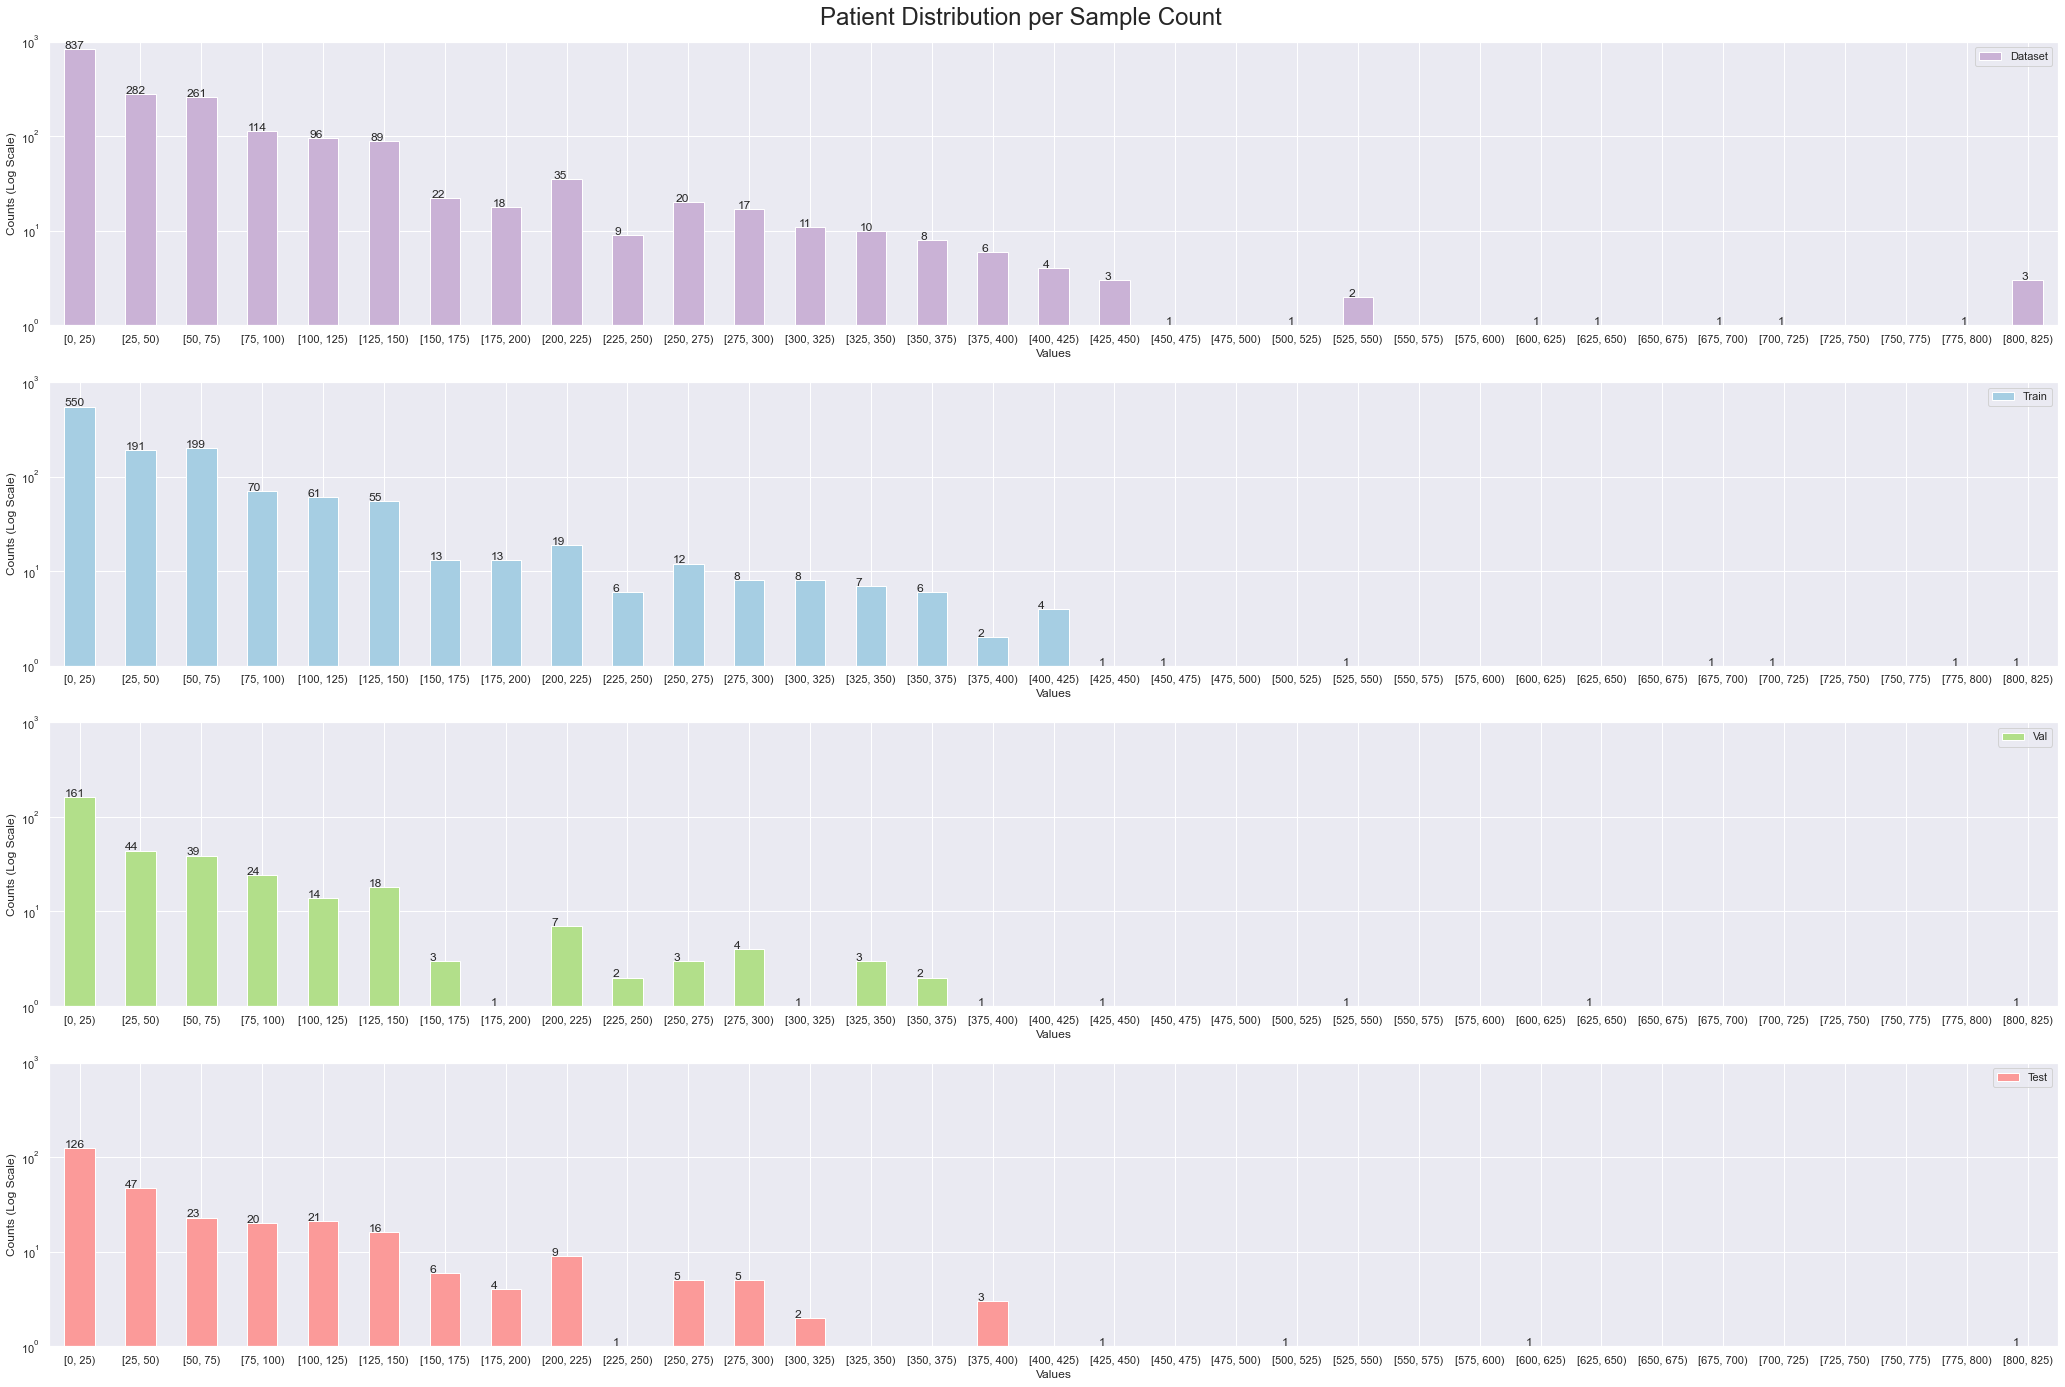

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

Dataset  Train  Val  Test
Values                               
[0, 25)         837    550  161   126
[25, 50)        282    191   44    47
[50, 75)        261    199   39    23
[75, 100)       114     70   24    20
[100, 125)       96     61   14    21
[125, 150)       89     55   18    16
[150, 175)       22     13    3     6
[175, 200)       18     13    1     4
[200, 225)       35     19    7     9
[225, 250)        9      6    2     1
[250, 275)       20     12    3     5
[275, 300)       17      8    4     5
[300, 325)       11      8    1     2
[325, 350)       10      7    3     0
[350, 375)        8      6    2     0
[375, 400)        6      2    1     3
[400, 425)        4      4    0     0
[425, 450)        3      1    1     1
[450, 475)        1      1    0     0
[475, 500)        0      0    0     0
[500, 525)        1      0    0     1
[525, 550)        2      1    1     0
[550, 575)        0      0    0     0
[575, 600)        0      0    0     0
[600, 625)        1      0    0     1
[625, 650)        1      0    1     0
[650, 675)        0      0    0     0
[675, 700)        1      1    0     0
[700, 725)        1      1    0     0
[725, 750)        0      0    0     0
[750, 775)        0      0    0     0
[775, 800)        1      1    0     0
[800, 825)        3      1    1     1
SUM            1854   1231  331   292

# Plots

## Class

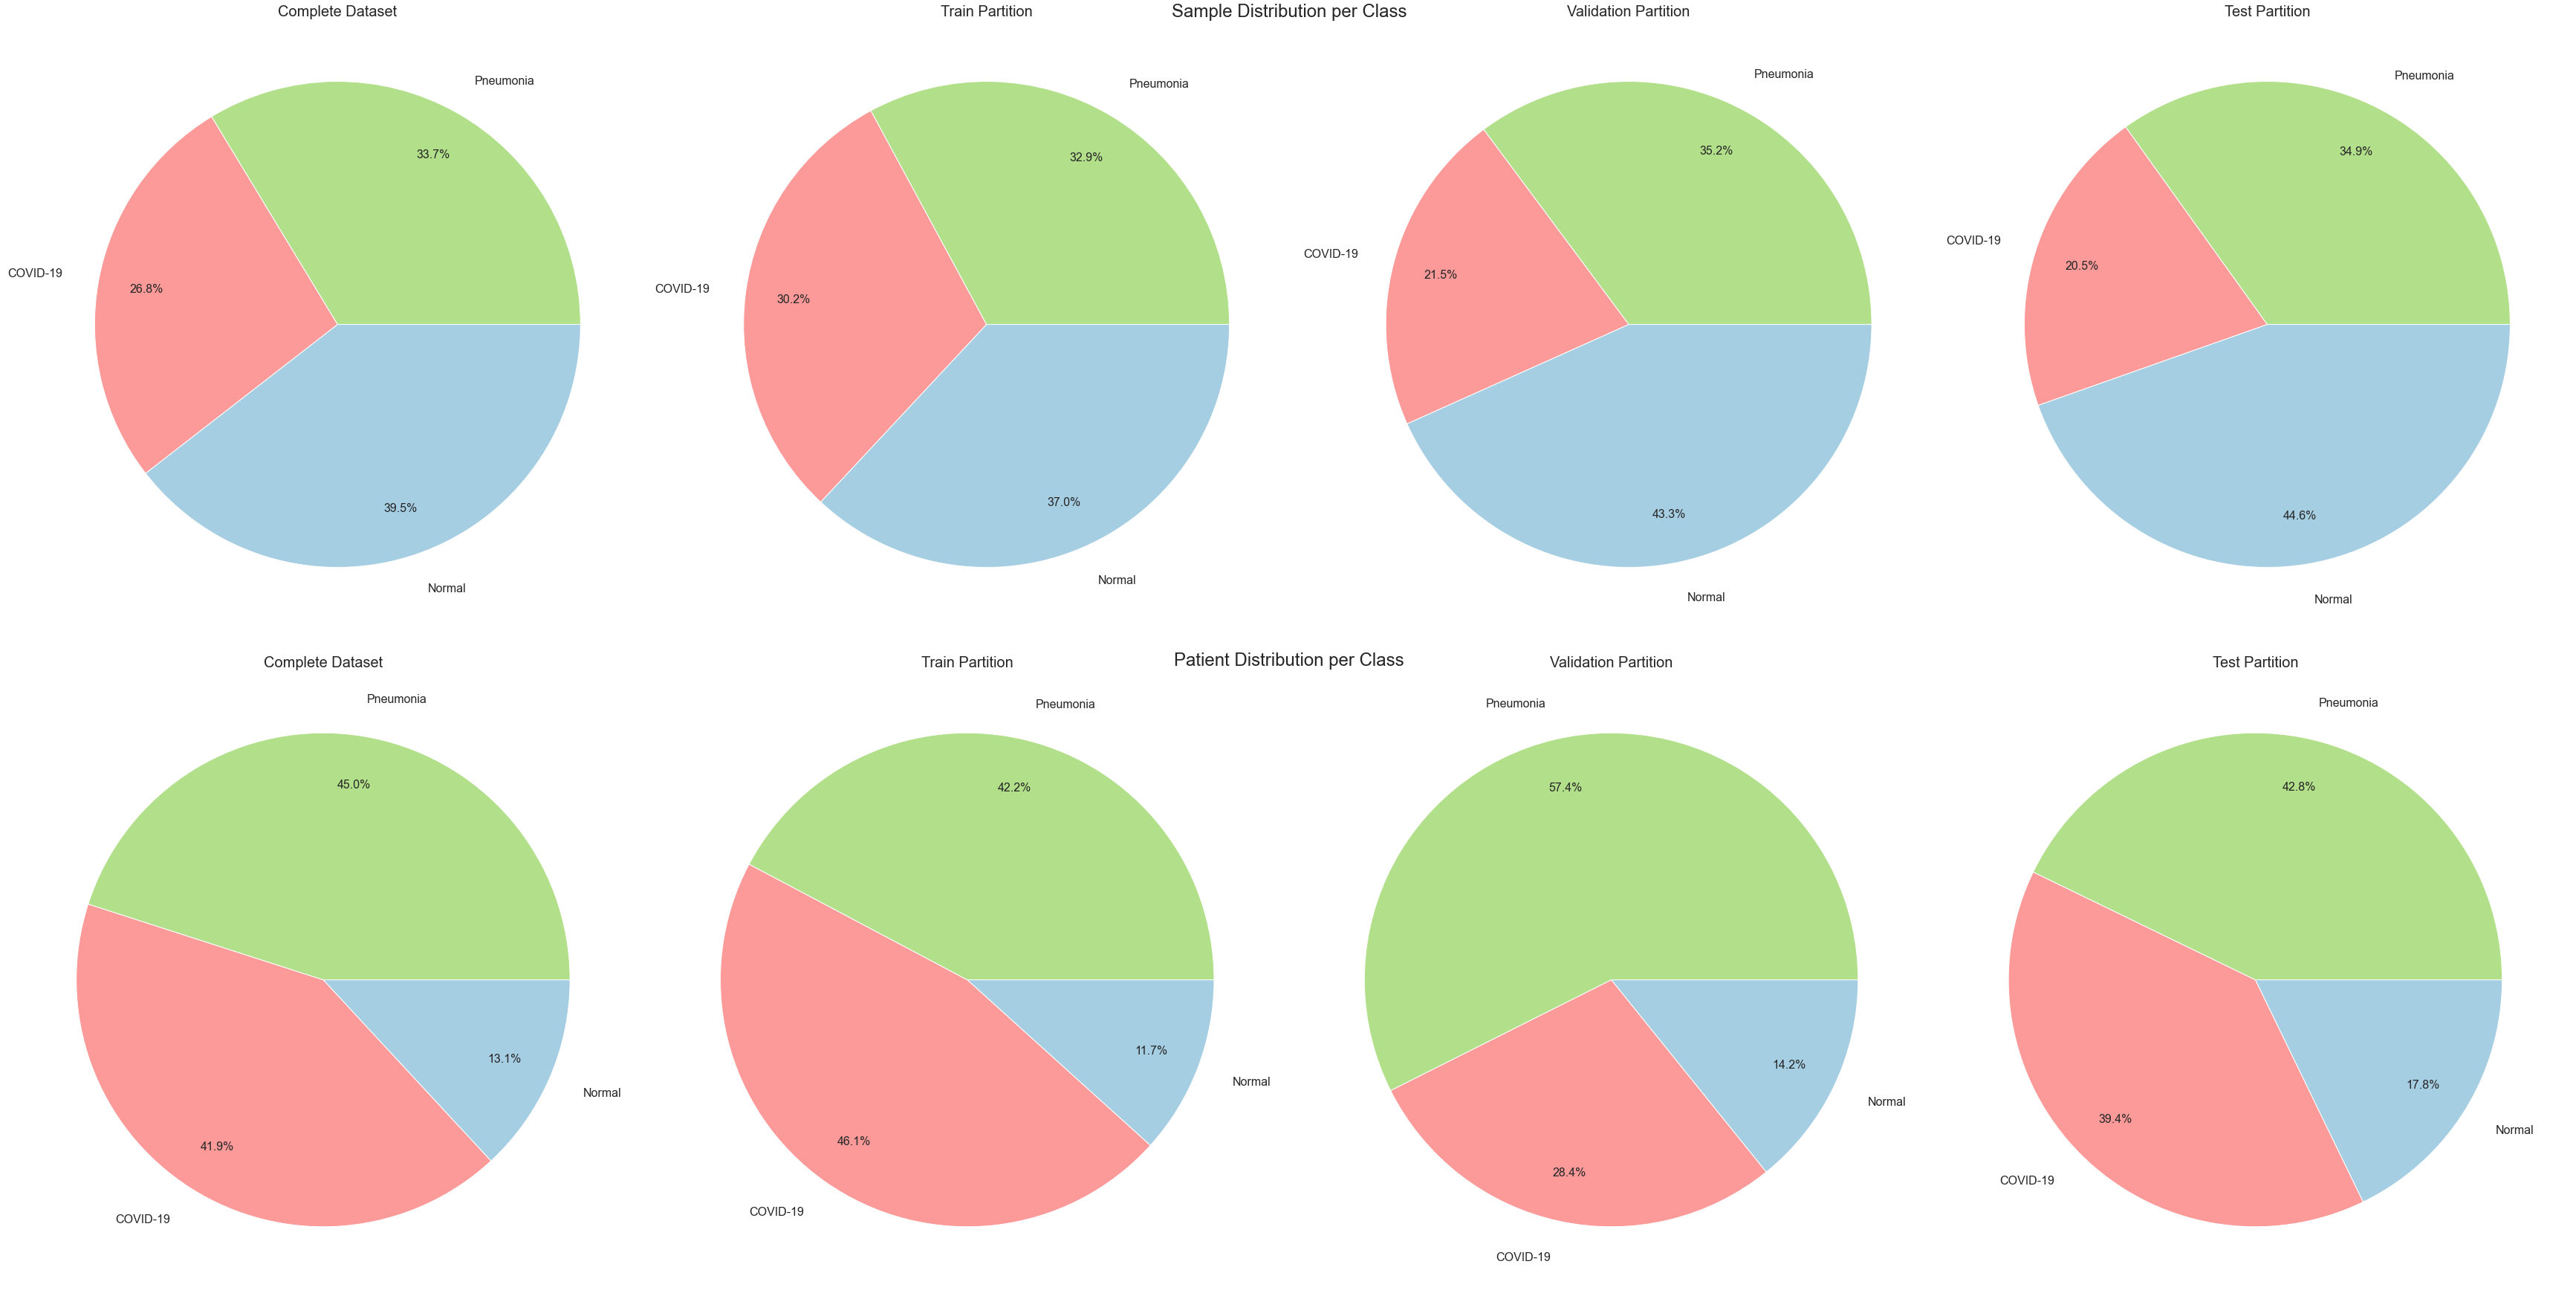

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 31070 
 22197 
 4528 
 4345 
 
 
 Normal 
 45758 
 27201 
 9107 
 9450 
 
 
 Pneumonia 
 39009 
 24214 
 7400 
 7395 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 776 
 567 
 94 
 115 
 
 
 Pneumonia 
 835 
 520 
 190 
 125 
 
 
 Normal 
 243 
 144 
 47 
 52 
 
 
 SUM 
 1854 
 1231 
 331 
 292

## Age

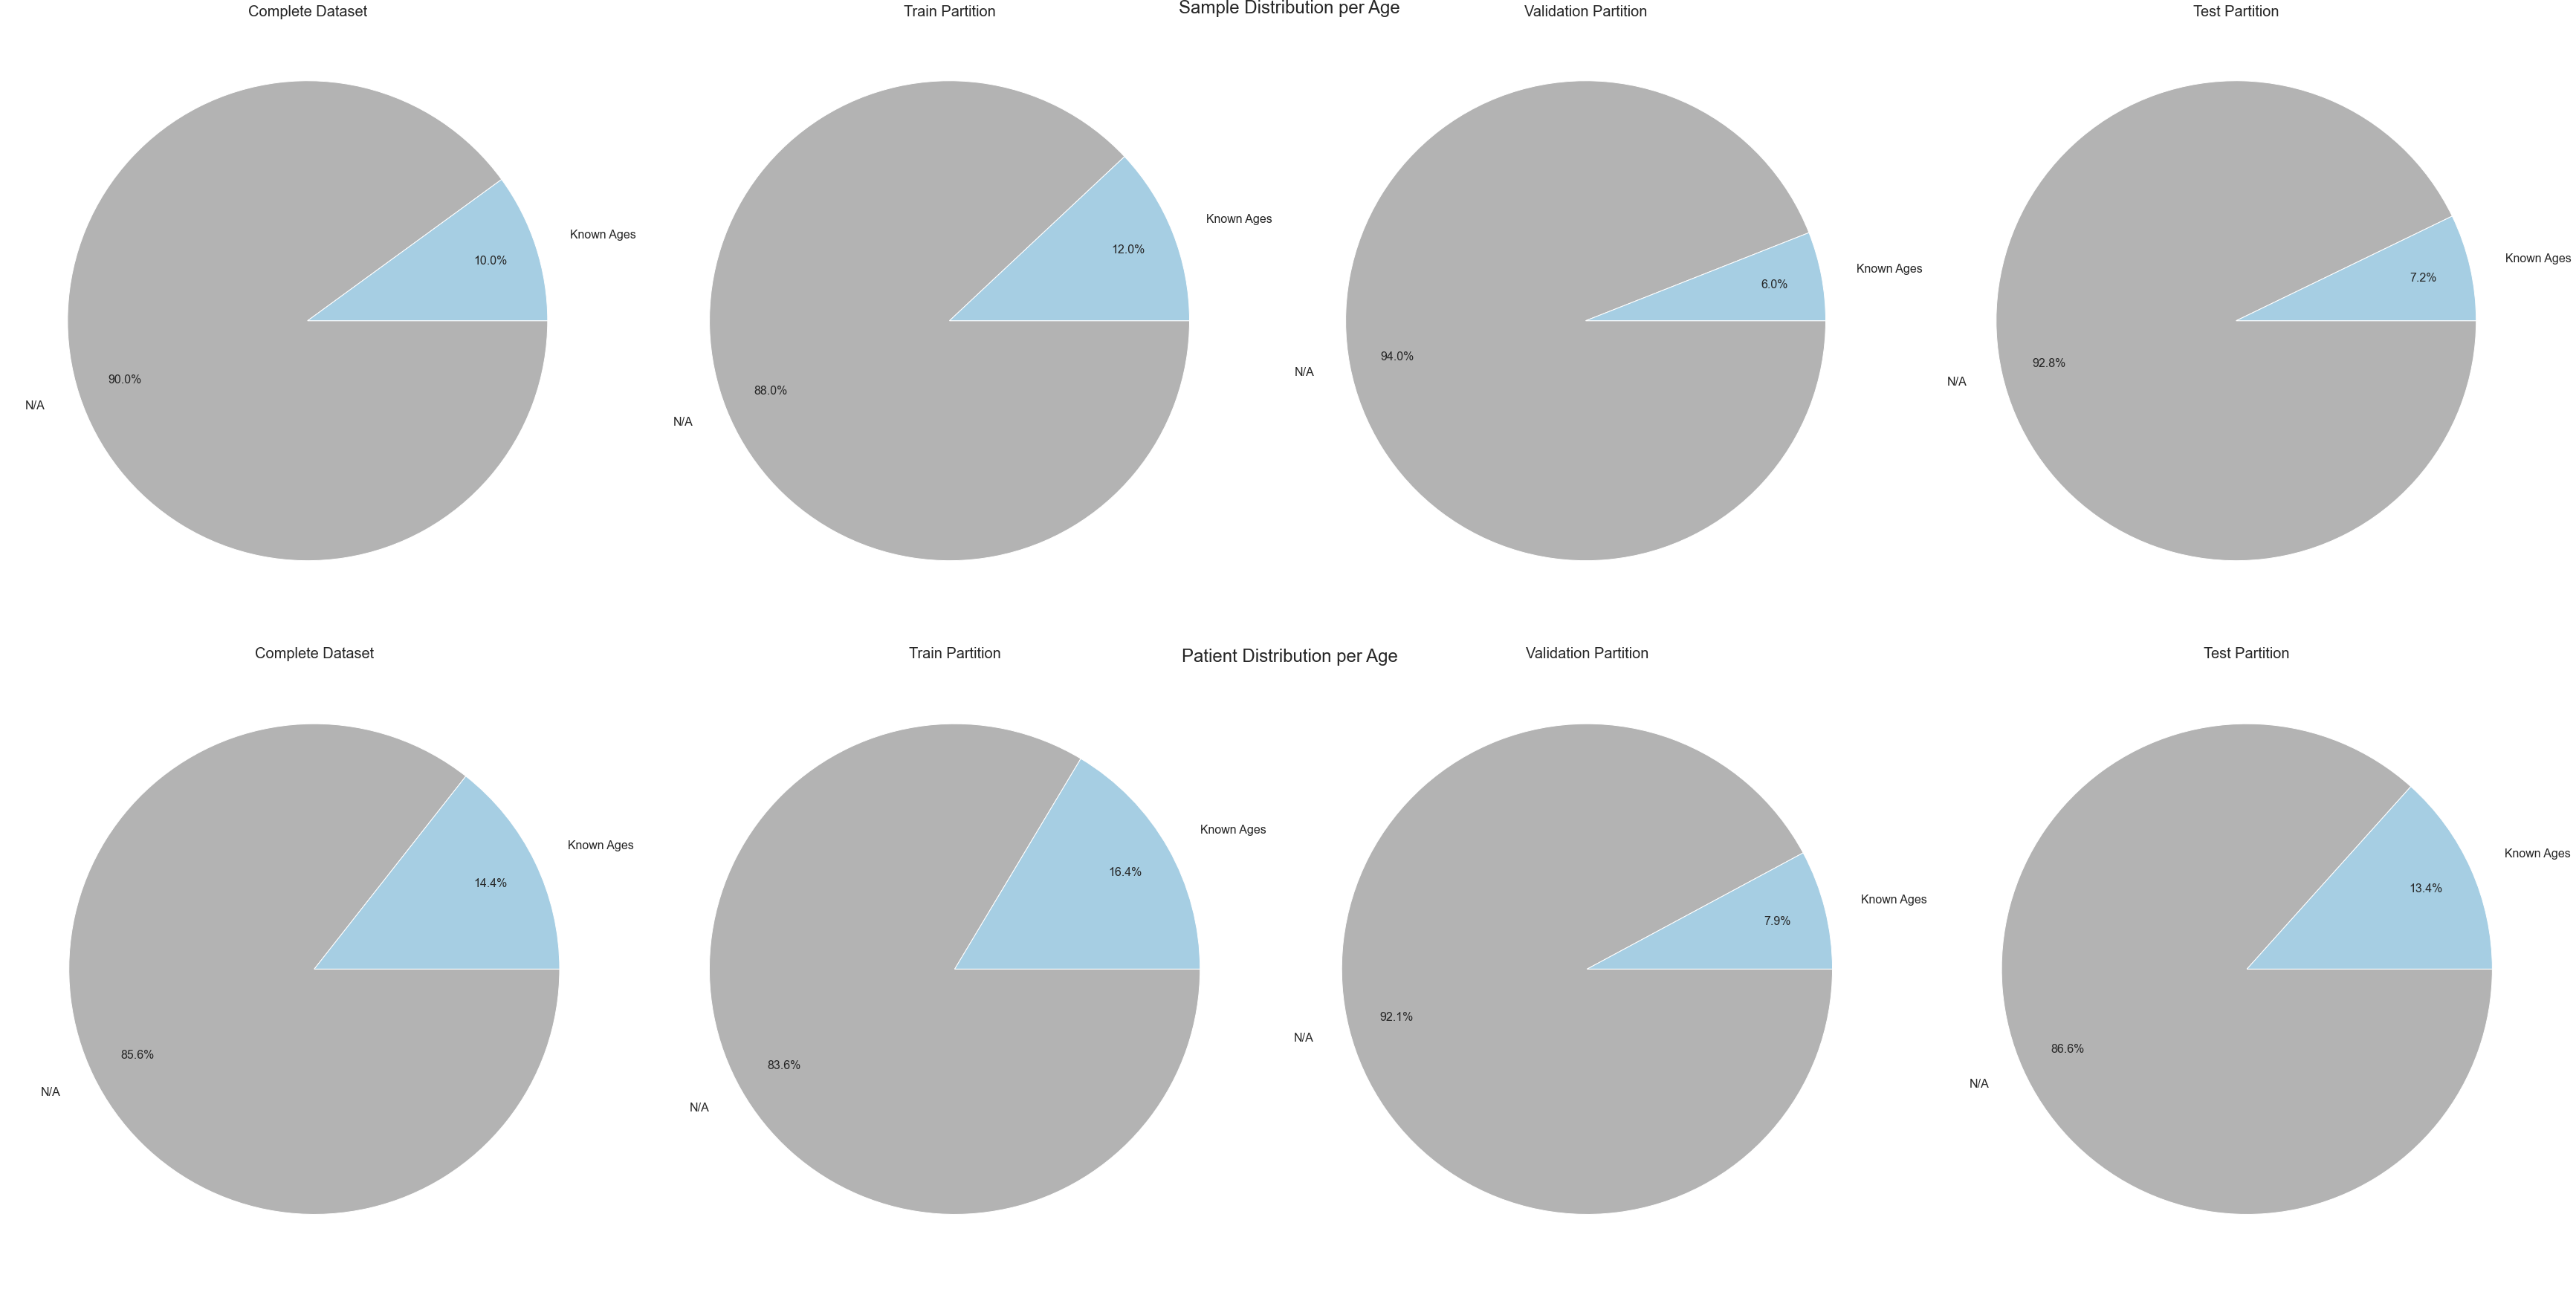

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 104230 
 64784 
 19777 
 19669 
 
 
 Known Ages 
 11607 
 8828 
 1258 
 1521 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 1587 
 1029 
 305 
 253 
 
 
 Known Ages 
 267 
 202 
 26 
 39 
 
 
 SUM 
 1854 
 1231 
 331 
 292

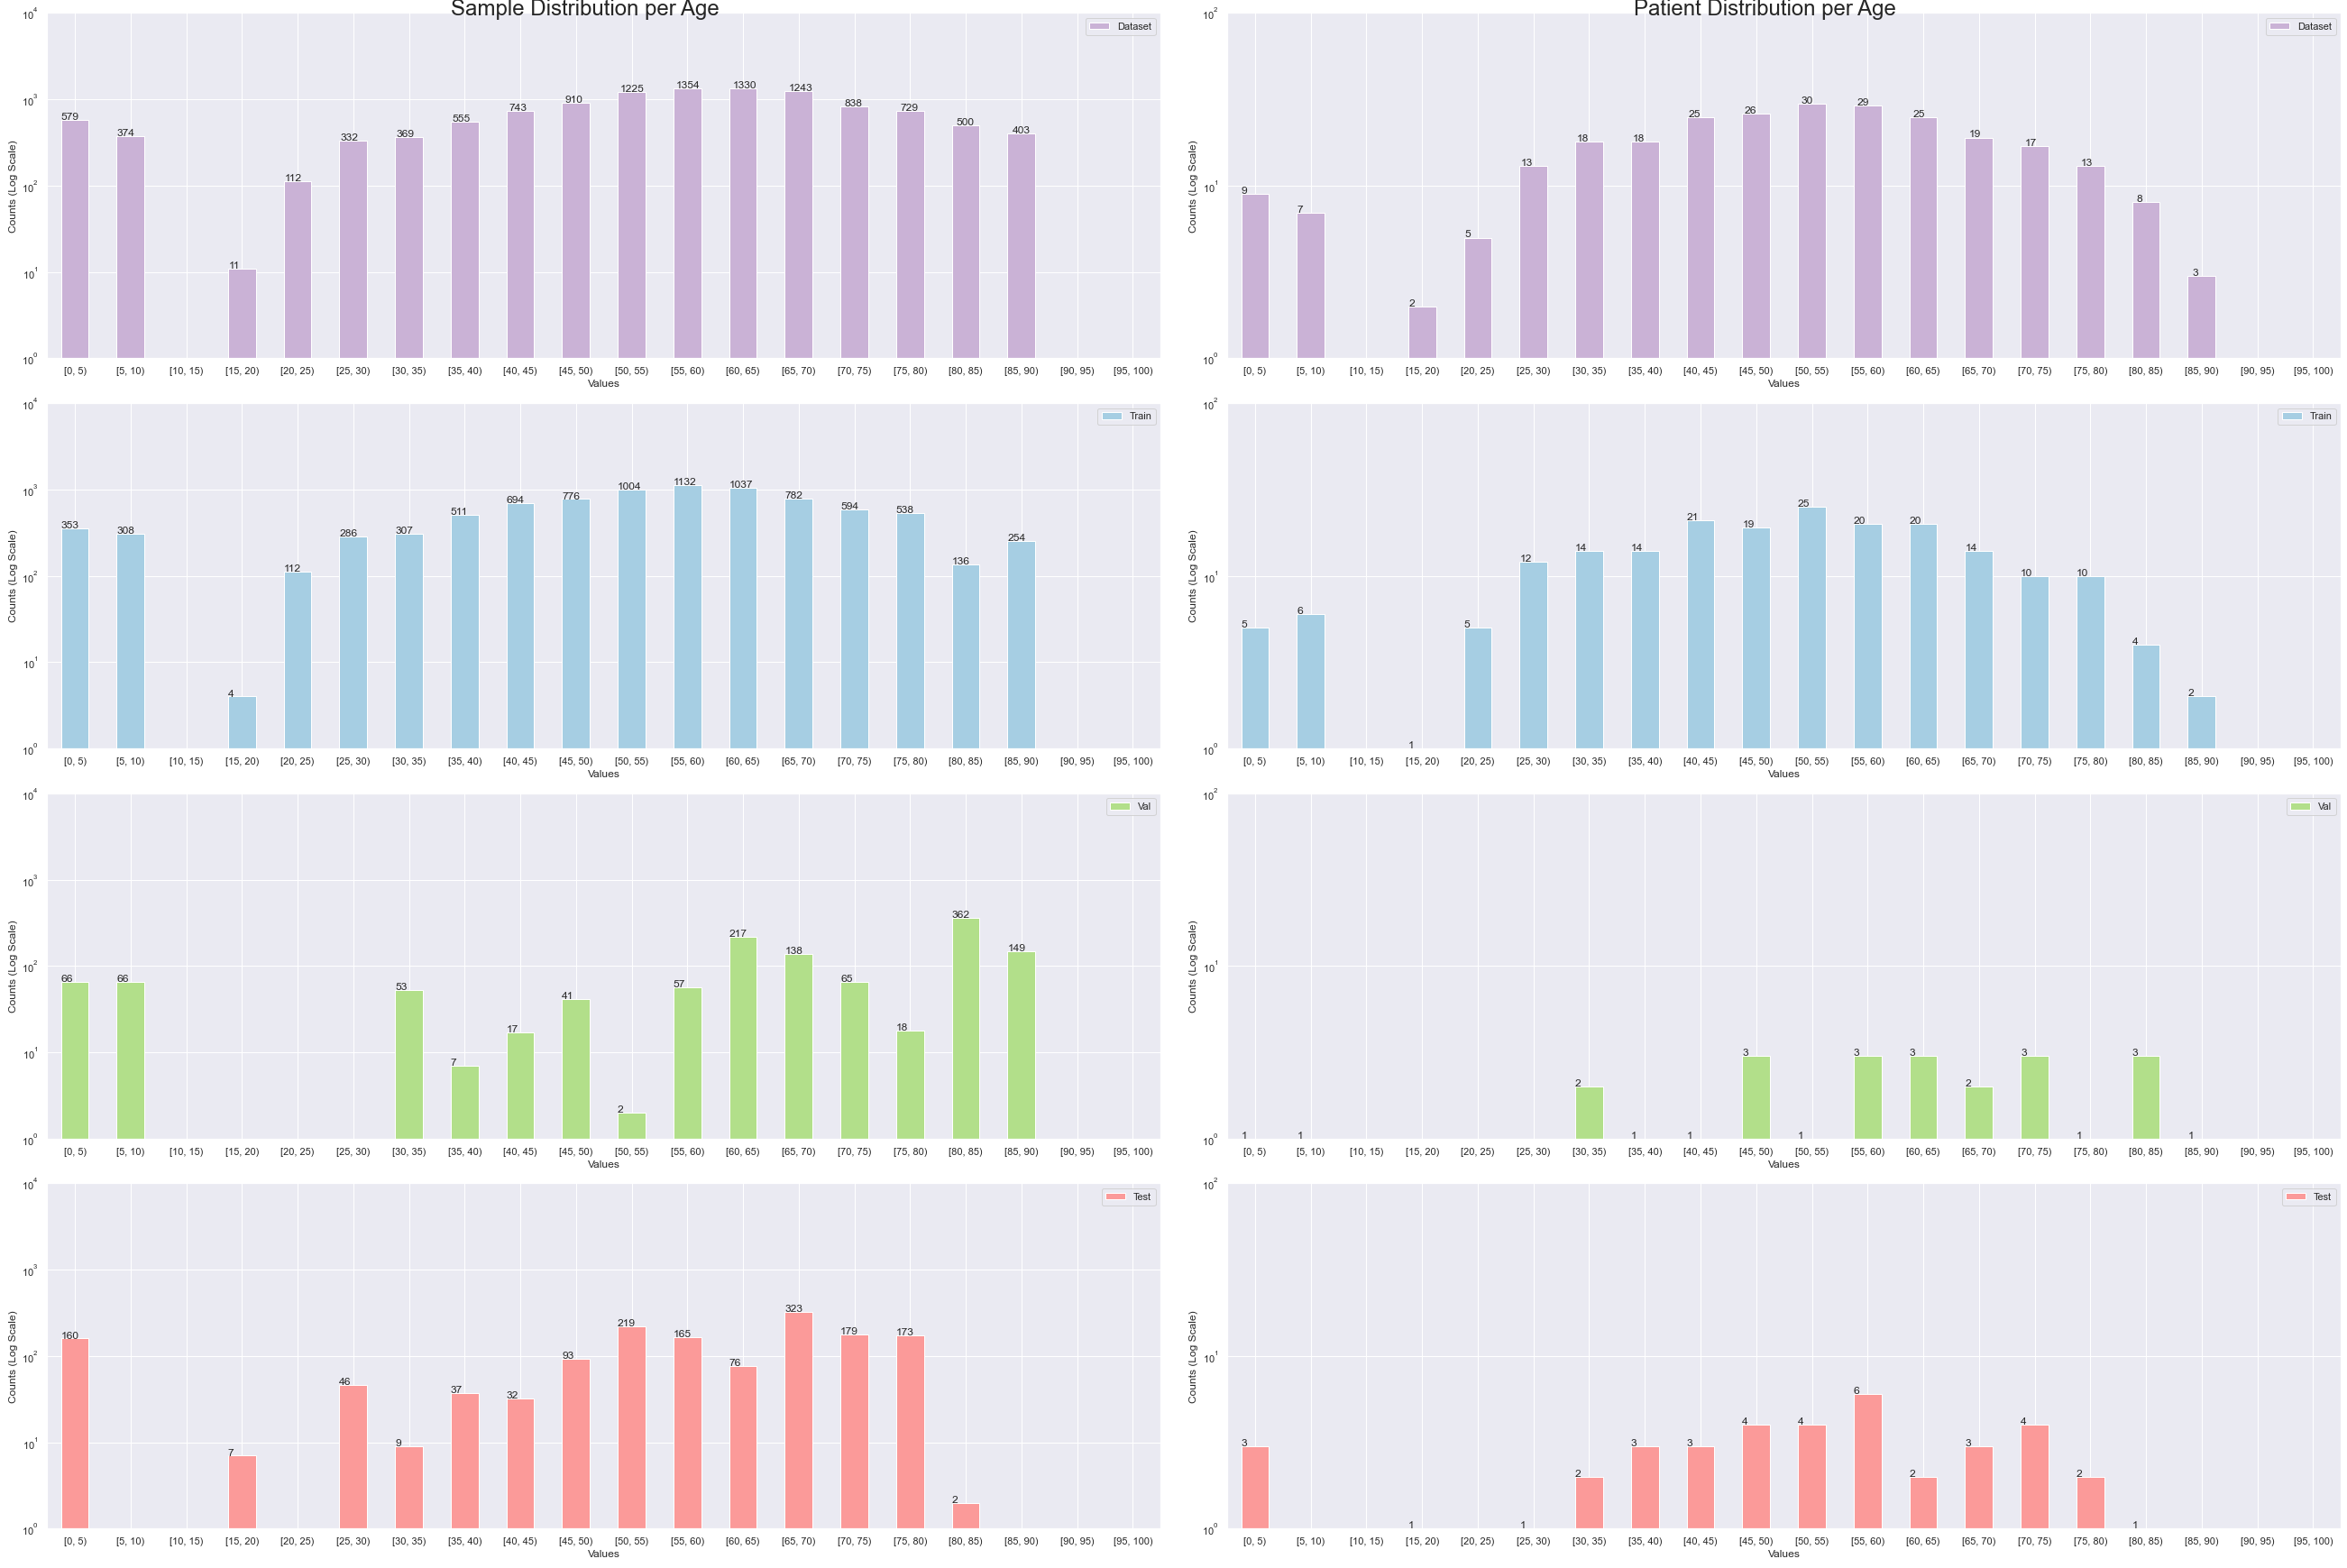

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 579 
 353 
 66 
 160 
 
 
 [5, 10) 
 374 
 308 
 66 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 11 
 4 
 0 
 7 
 
 
 [20, 25) 
 112 
 112 
 0 
 0 
 
 
 [25, 30) 
 332 
 286 
 0 
 46 
 
 
 [30, 35) 
 369 
 307 
 53 
 9 
 
 
 [35, 40) 
 555 
 511 
 7 
 37 
 
 
 [40, 45) 
 743 
 694 
 17 
 32 
 
 
 [45, 50) 
 910 
 776 
 41 
 93 
 
 
 [50, 55) 
 1225 
 1004 
 2 
 219 
 
 
 [55, 60) 
 1354 
 1132 
 57 
 165 
 
 
 [60, 65) 
 1330 
 1037 
 217 
 76 
 
 
 [65, 70) 
 1243 
 782 
 138 
 323 
 
 
 [70, 75) 
 838 
 594 
 65 
 179 
 
 
 [75, 80) 
 729 
 538 
 18 
 173 
 
 
 [80, 85) 
 500 
 136 
 362 
 2 
 
 
 [85, 90) 
 403 
 254 
 149 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 11607 
 8828 
 1258 
 1521 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 9 
 5 
 1 
 3 
 
 
 [5, 10) 
 7 
 6 
 1 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 2 
 1 
 0 
 1 
 
 
 [20, 25) 
 5 
 5 
 0 
 0 
 
 
 [25, 30) 
 13 
 12 
 0 
 1 
 
 
 [30, 35) 
 18 
 14 
 2 
 2 
 
 
 [35, 40) 
 18 
 14 
 1 
 3 
 
 
 [40, 45) 
 25 
 21 
 1 
 3 
 
 
 [45, 50) 
 26 
 19 
 3 
 4 
 
 
 [50, 55) 
 30 
 25 
 1 
 4 
 
 
 [55, 60) 
 29 
 20 
 3 
 6 
 
 
 [60, 65) 
 25 
 20 
 3 
 2 
 
 
 [65, 70) 
 19 
 14 
 2 
 3 
 
 
 [70, 75) 
 17 
 10 
 3 
 4 
 
 
 [75, 80) 
 13 
 10 
 1 
 2 
 
 
 [80, 85) 
 8 
 4 
 3 
 1 
 
 
 [85, 90) 
 3 
 2 
 1 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 267 
 202 
 26 
 39

## Sex

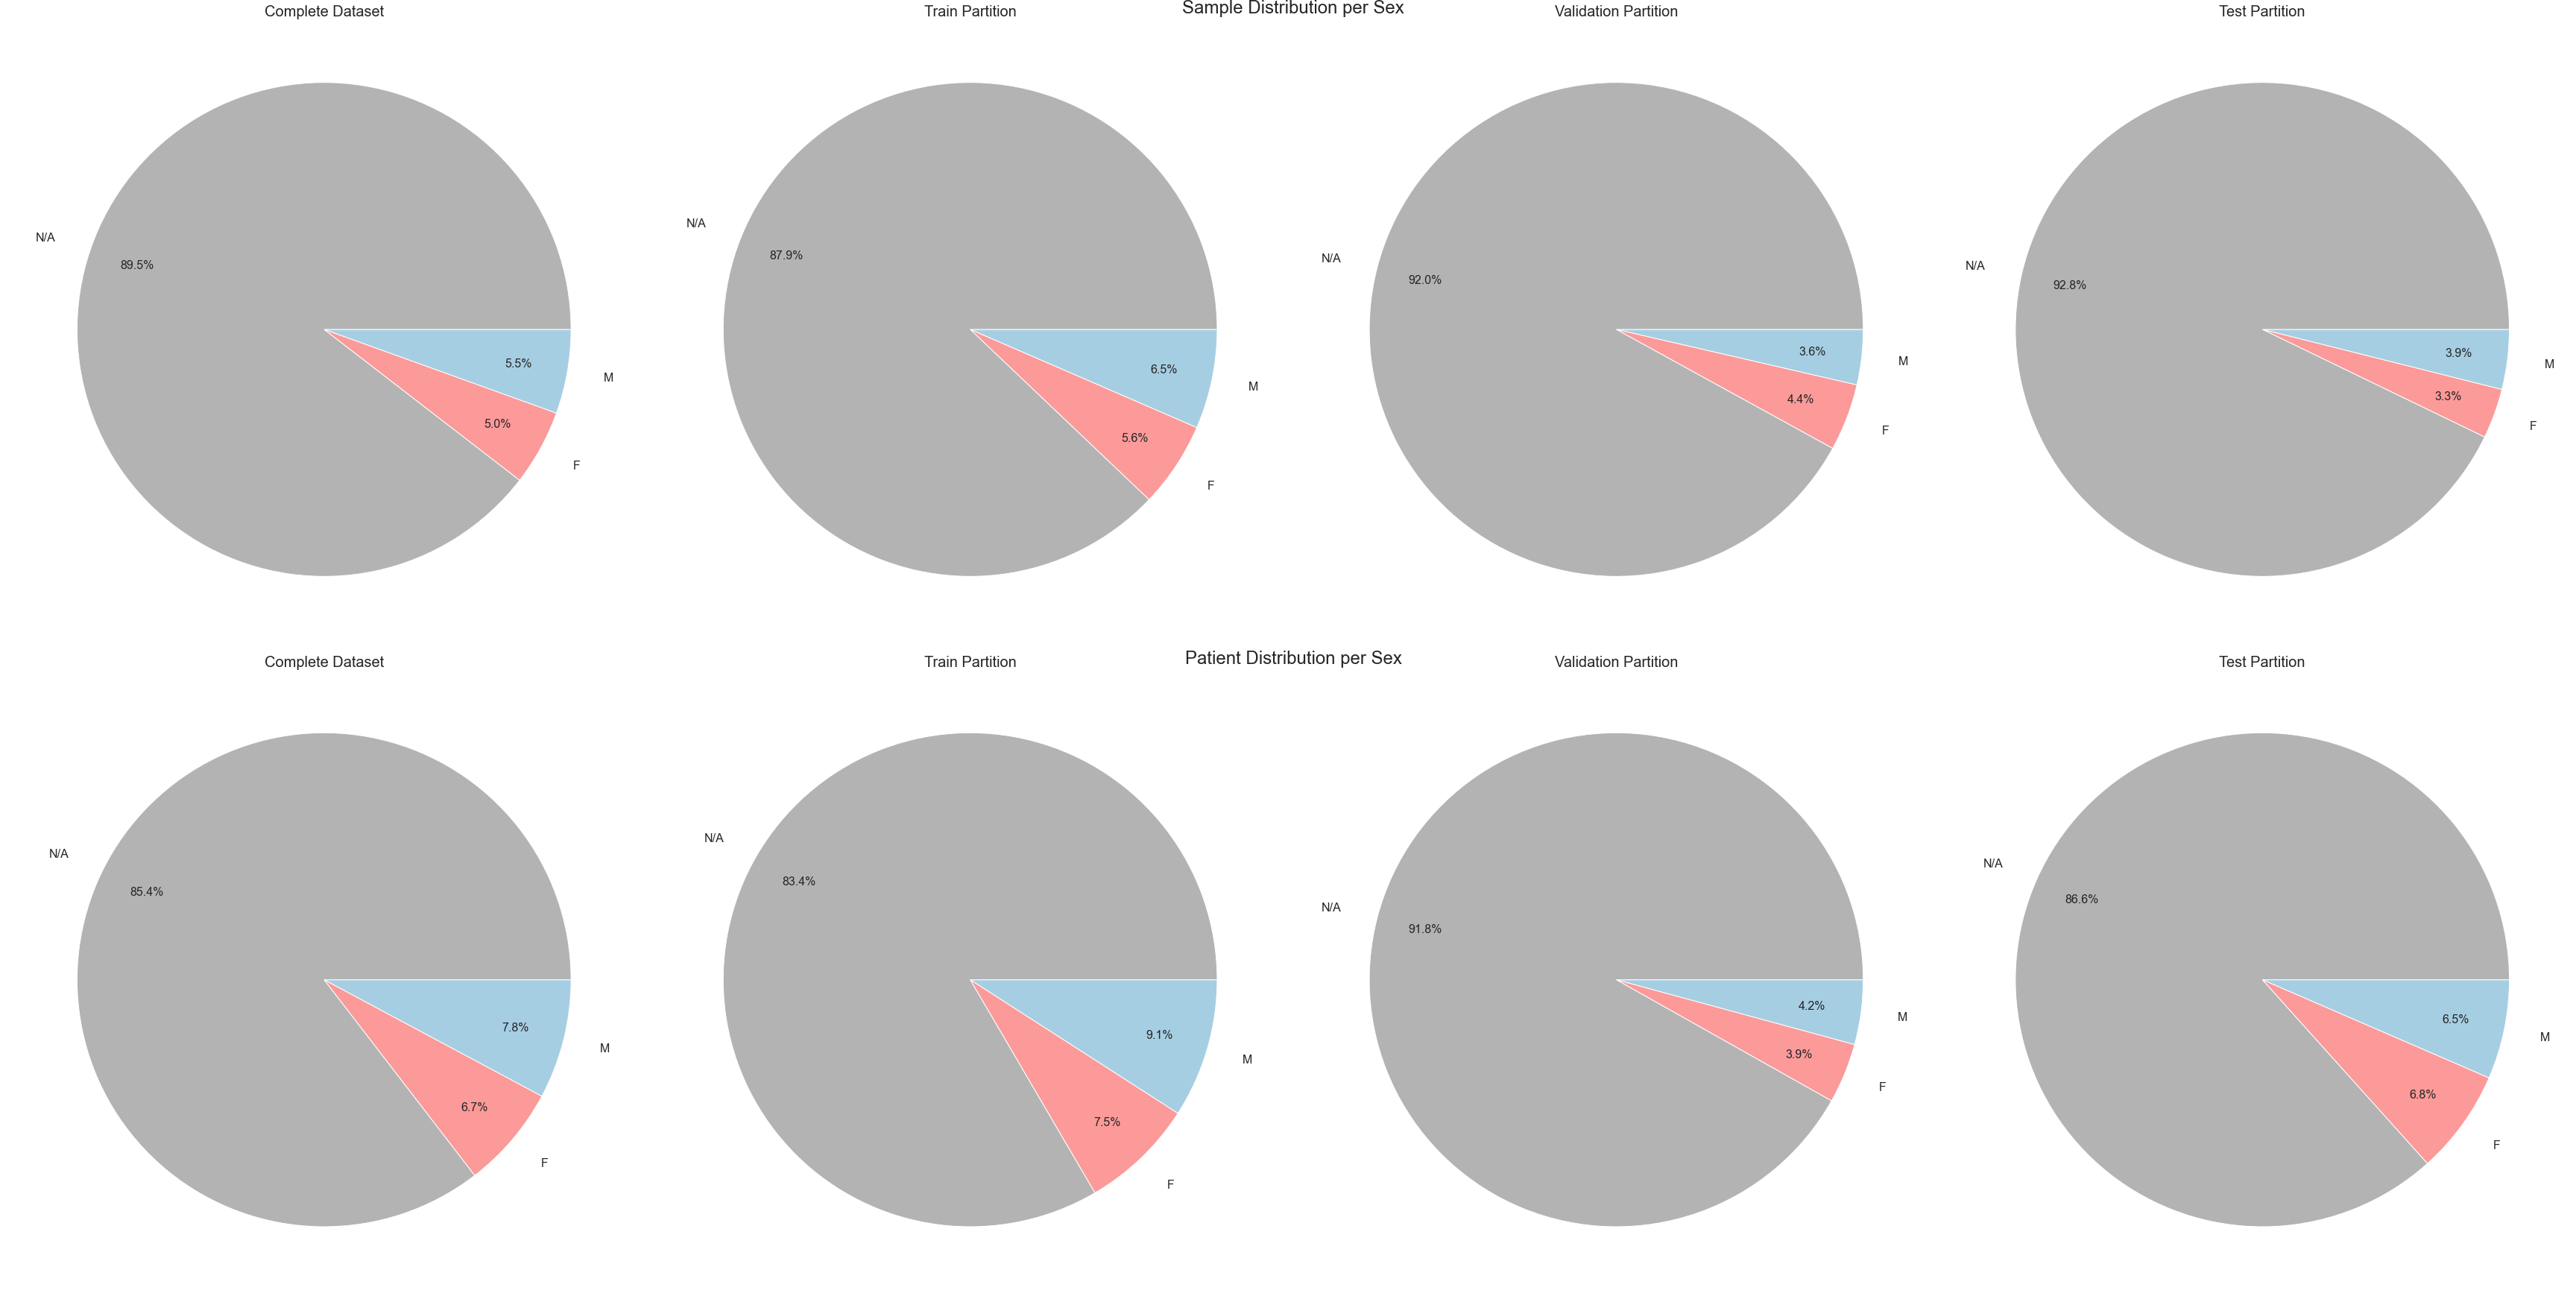

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 6380 
 4791 
 760 
 829 
 
 
 N/A 
 103720 
 64699 
 19352 
 19669 
 
 
 F 
 5737 
 4122 
 923 
 692 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 1584 
 1027 
 304 
 253 
 
 
 M 
 145 
 112 
 14 
 19 
 
 
 F 
 125 
 92 
 13 
 20 
 
 
 SUM 
 1854 
 1231 
 331 
 292

## Country

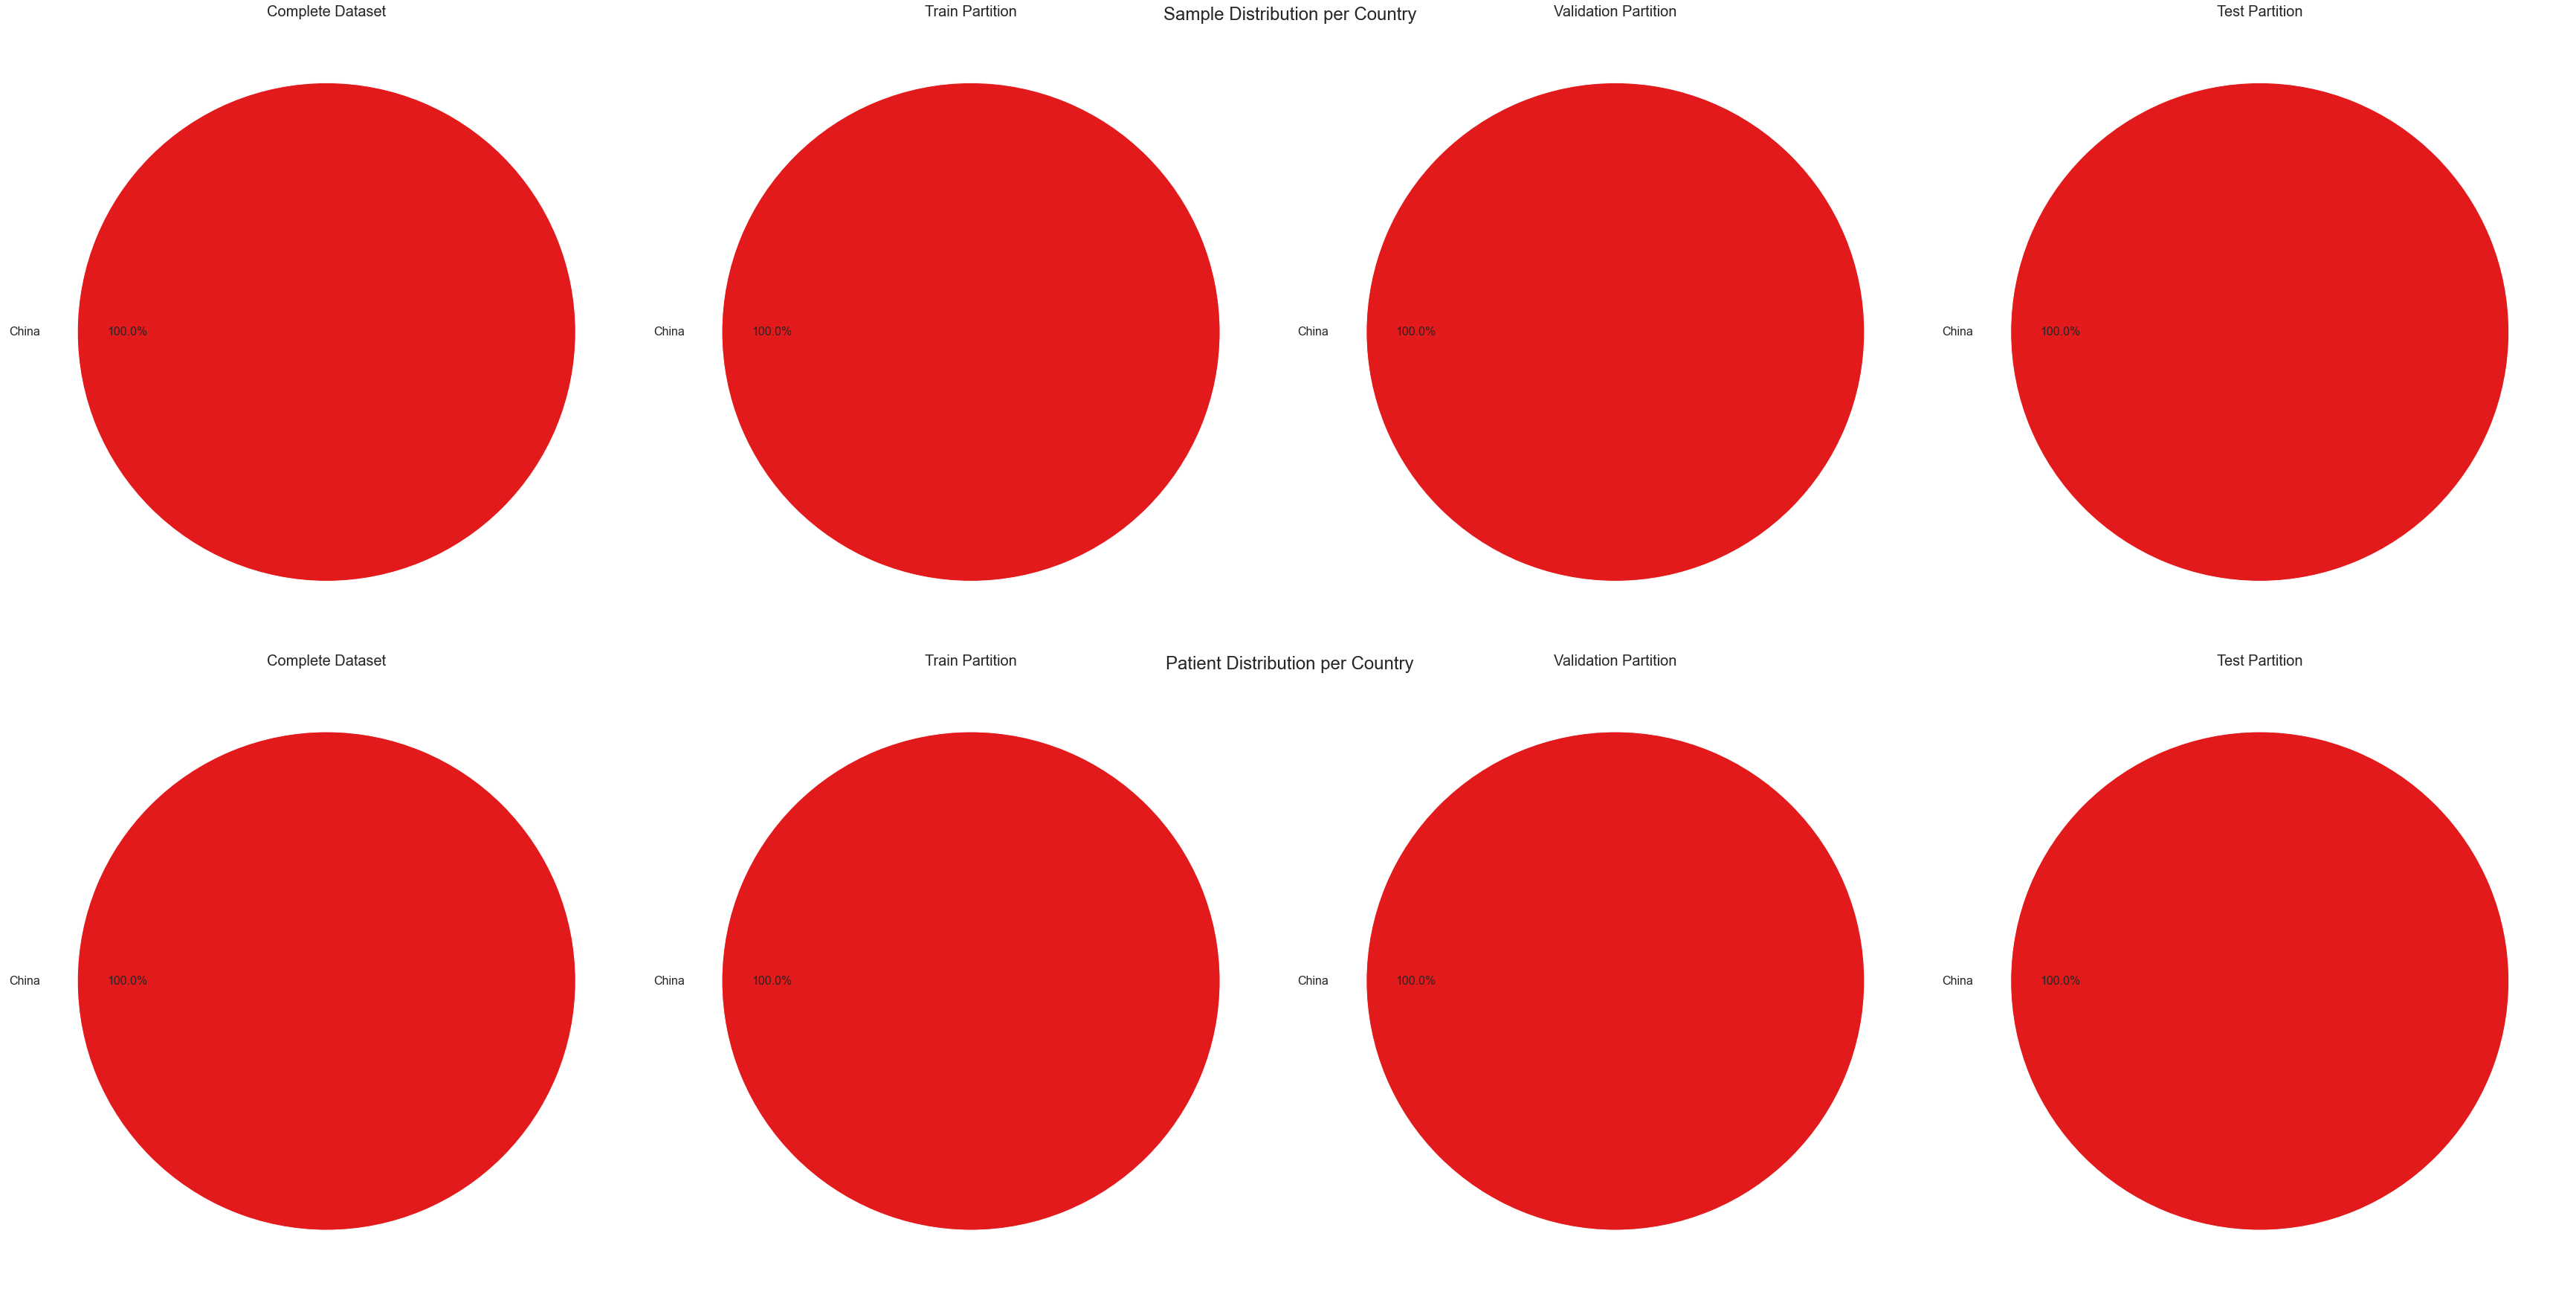

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 115837 
 73612 
 21035 
 21190 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 1854 
 1231 
 331 
 292 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 SUM 
 1854 
 1231 
 331 
 292

## Partition

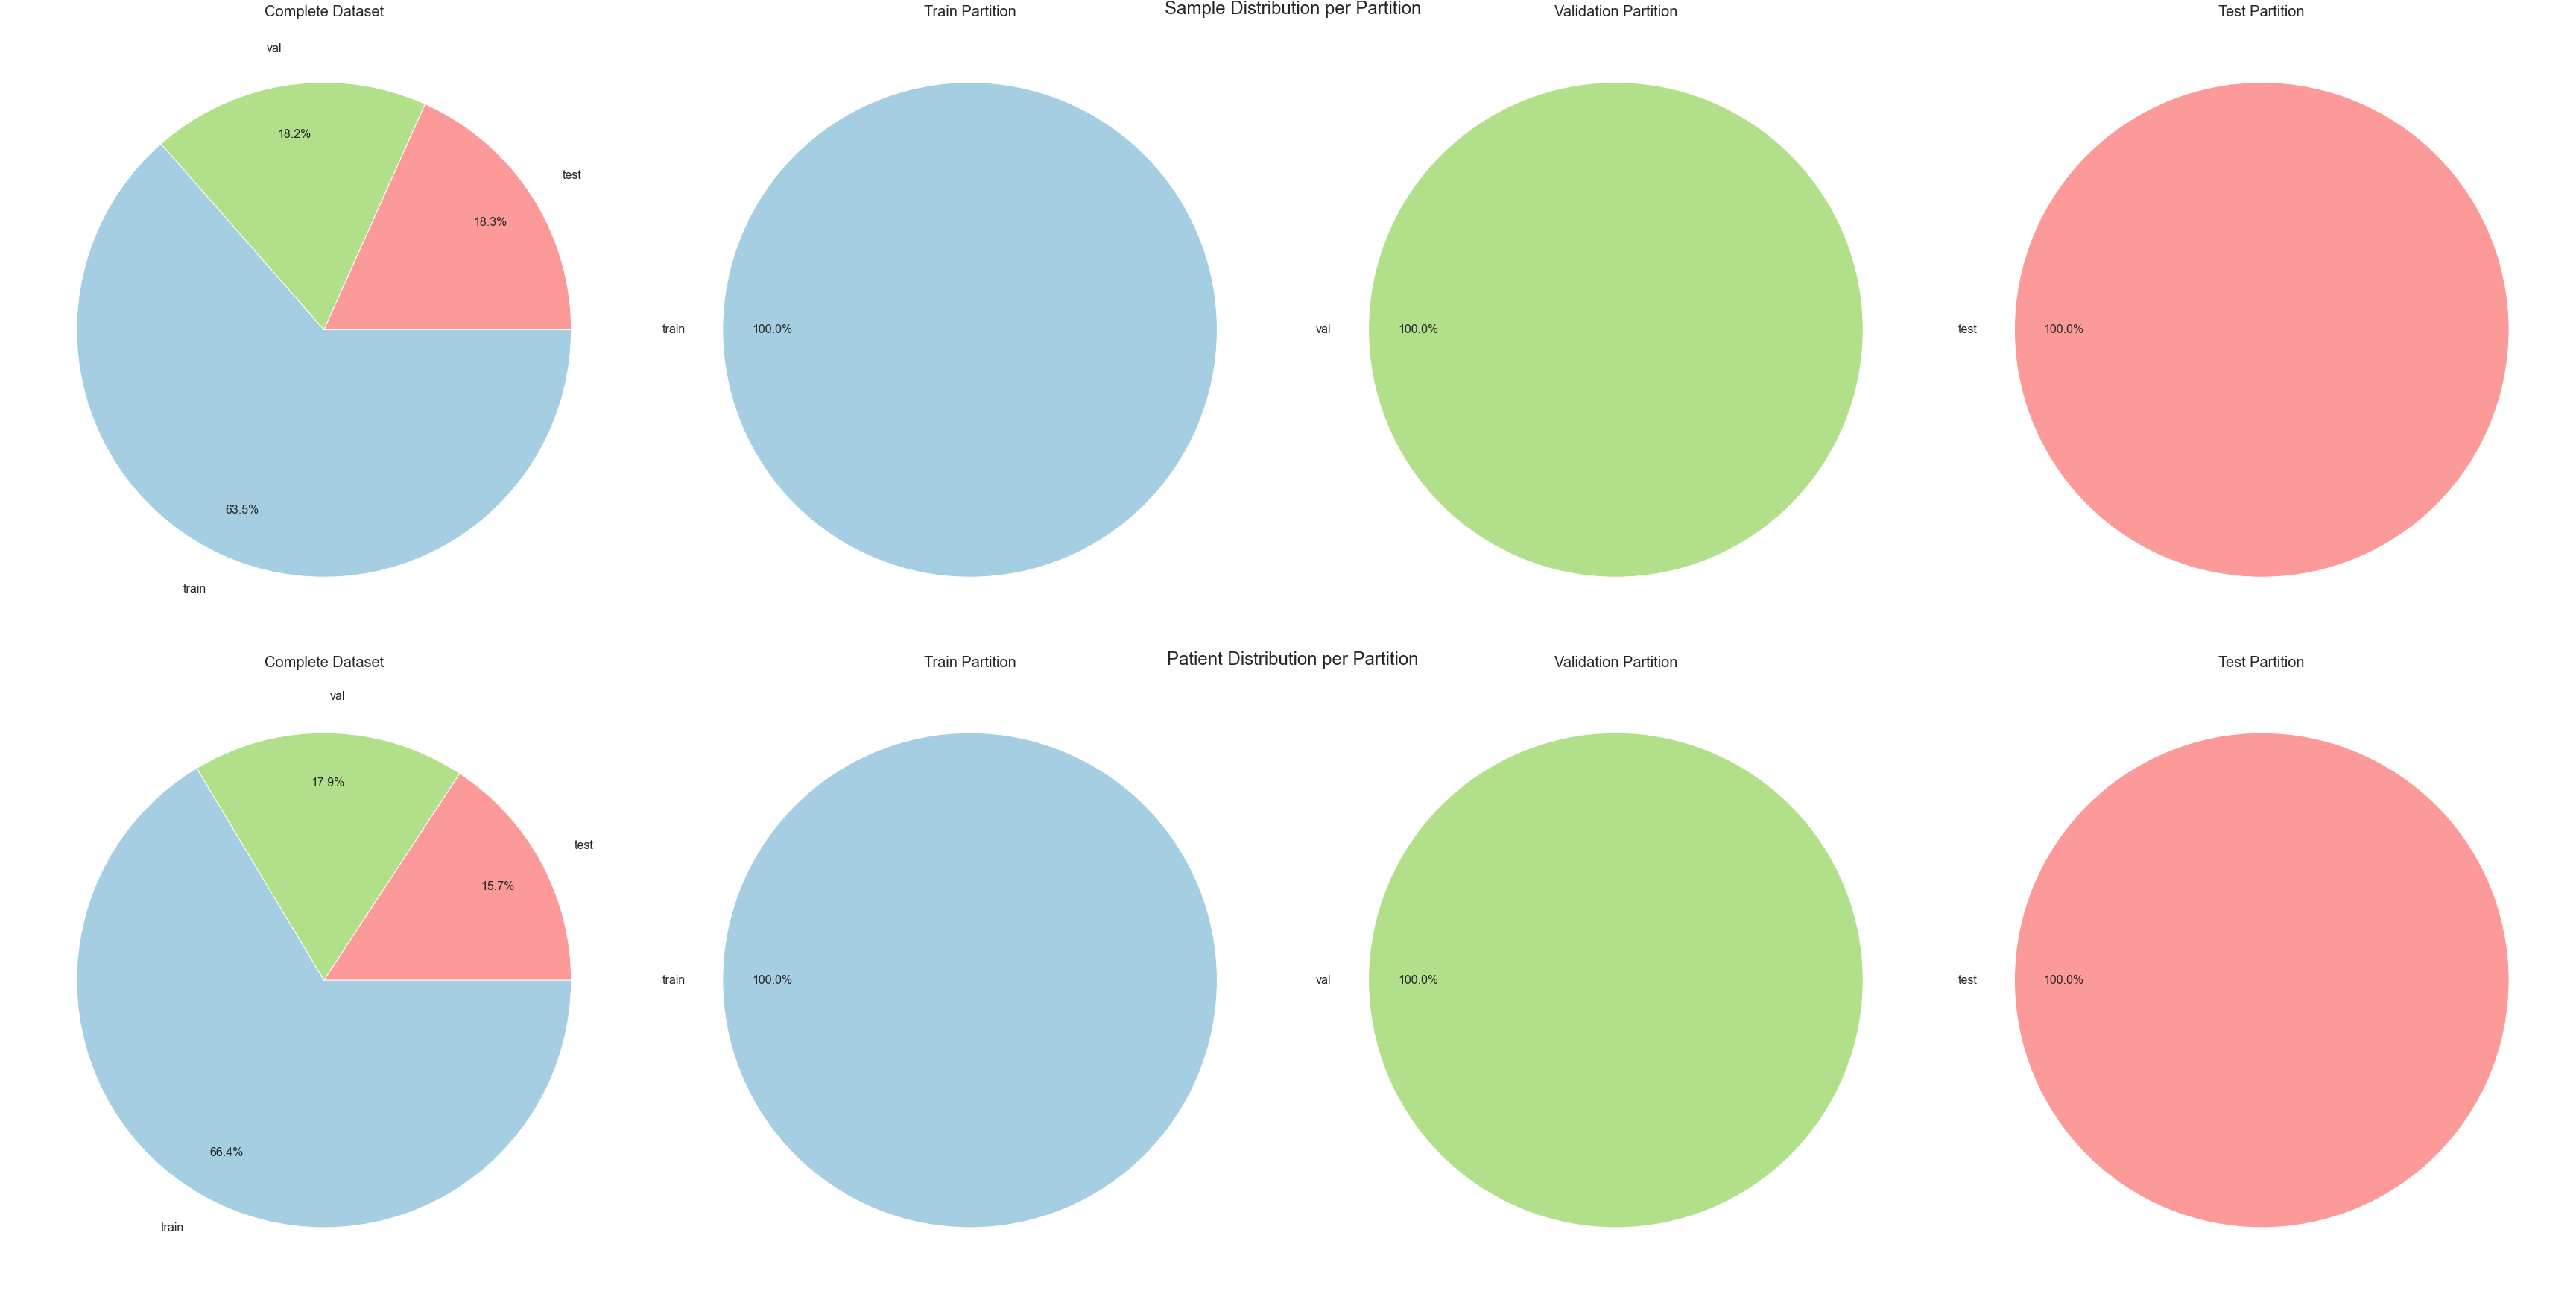

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 73612 
 73612 
 0 
 0 
 
 
 test 
 21190 
 0 
 0 
 21190 
 
 
 val 
 21035 
 0 
 21035 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 1231 
 1231 
 0 
 0 
 
 
 val 
 331 
 0 
 331 
 0 
 
 
 test 
 292 
 0 
 0 
 292 
 
 
 SUM 
 1854 
 1231 
 331 
 292

## Slice Selection

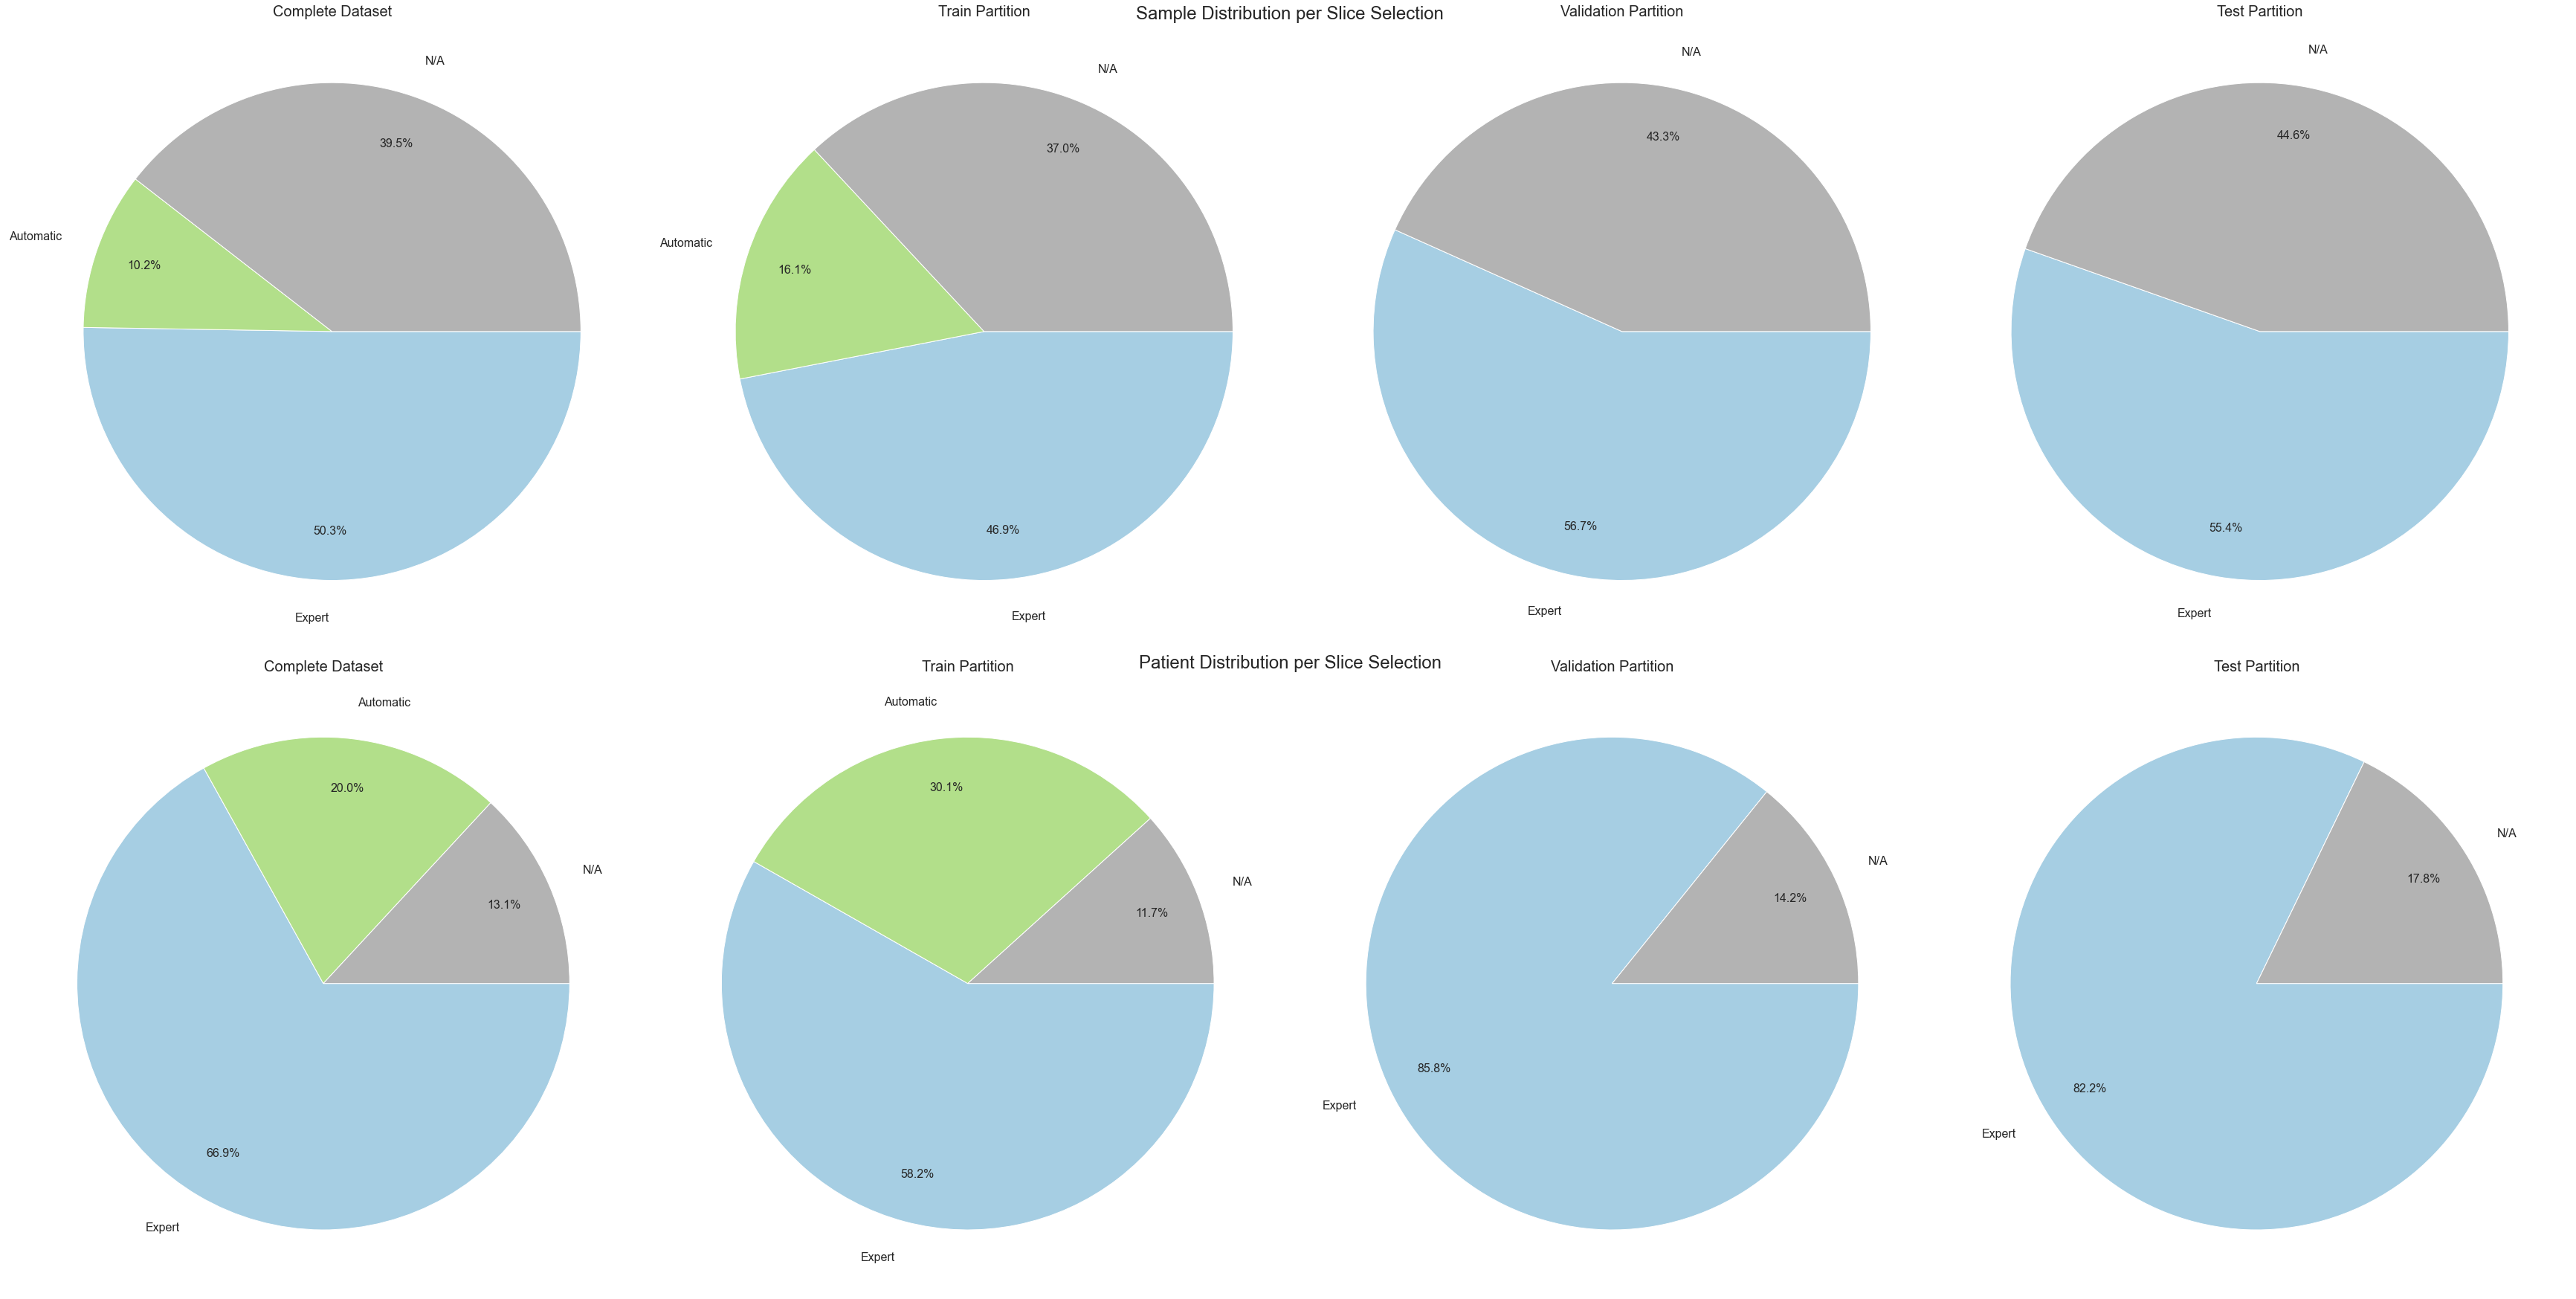

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 11856 
 11856 
 0 
 0 
 
 
 Expert 
 58223 
 34555 
 11928 
 11740 
 
 
 N/A 
 45758 
 27201 
 9107 
 9450 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 Patient Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 370 
 370 
 0 
 0 
 
 
 Expert 
 1241 
 717 
 284 
 240 
 
 
 N/A 
 243 
 144 
 47 
 52 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 1854 
 1231 
 331 
 292

# Data Split

In [21]:
new_samples_df, new_patient_df = split.dataset_by_samples( samples_df, patient_df, dataset_name, age_bin_len = 20, seed = 3 )

    1/25: Group ('N/A', 'Normal', 'N/A', 'China', 'N/A')
	[Test] Moved 9134 samples (48 patients), expected 9151 samples, had 45758 samples (243 patients)...
		List of sample counts: [60, 341, 27, 60, 702, 280, 202, 24, 374, 246, 212, 148, 391, 32, 324, 318, 28, 298, 136, 203, 105, 129, 25, 178, 122, 134, 402, 212, 60, 134, 278, 406, 30, 189, 260, 102, 30, 132, 151, 140, 360, 276, 94, 538, 29, 126, 24, 106, 62, 110, 27, 284, 138, 297, 122, 308, 132, 114, 74, 201, 228, 205, 358, 156, 82, 473, 68, 126, 27, 264, 116, 380, 73, 222, 146, 363, 69, 63, 363, 105, 70, 110, 120, 124, 220, 132, 128, 61, 195, 254, 350, 197, 119, 108, 75, 130, 209, 180, 146, 138, 107, 256, 192, 139, 70, 27, 117, 122, 89, 418, 182, 208, 28, 30, 118, 25, 806, 289, 66, 231, 261, 140, 63, 300, 124, 118, 152, 152, 142, 210, 36, 682, 398, 22, 288, 281, 94, 370, 154, 138, 27, 321, 24, 128, 140, 138, 340, 284, 340, 142, 320, 325, 278, 411, 292, 182, 136, 107, 118, 436, 353, 116, 66, 120, 306, 148, 205, 55, 120, 343, 346, 6

	[Val] Moved 144 samples (5 patients), expected 145 samples, had 583 samples (15 patients)...
		List of sample counts: [69, 44, 58, 47, 50, 104, 15, 68, 14, 14, 71, 20, 2, 3, 4]



   13/25: Group ('F', 'COVID-19', 'Expert', 'China', (20, 40))
	[Test] Moved 33 samples (5 patients), expected 33 samples, had 165 samples (10 patients)...
		List of sample counts: [1, 7, 10, 14, 42, 1, 6, 29, 52, 3]
	[Val] Moved 9 samples (2 patients), expected 33 samples, had 132 samples (5 patients)...
		List of sample counts: [42, 6, 29, 52, 3]



   14/25: Group ('F', 'COVID-19', 'Automatic', 'China', (20, 40))
	[Test] Moved 52 samples (3 patients), expected 53 samples, had 269 samples (10 patients)...
		List of sample counts: [23, 37, 73, 1, 48, 28, 8, 2, 36, 13]
	[Val] Moved 47 samples (3 patients), expected 53 samples, had 217 samples (7 patients)...
		List of sample counts: [37, 73, 48, 8, 2, 36, 13]



   15/25: Group ('M', 'COVID-19', 'Expert', 'China', (40, 60))
	[Test] Moved 181 samples (12 pati

# Post Split Plots

## Class

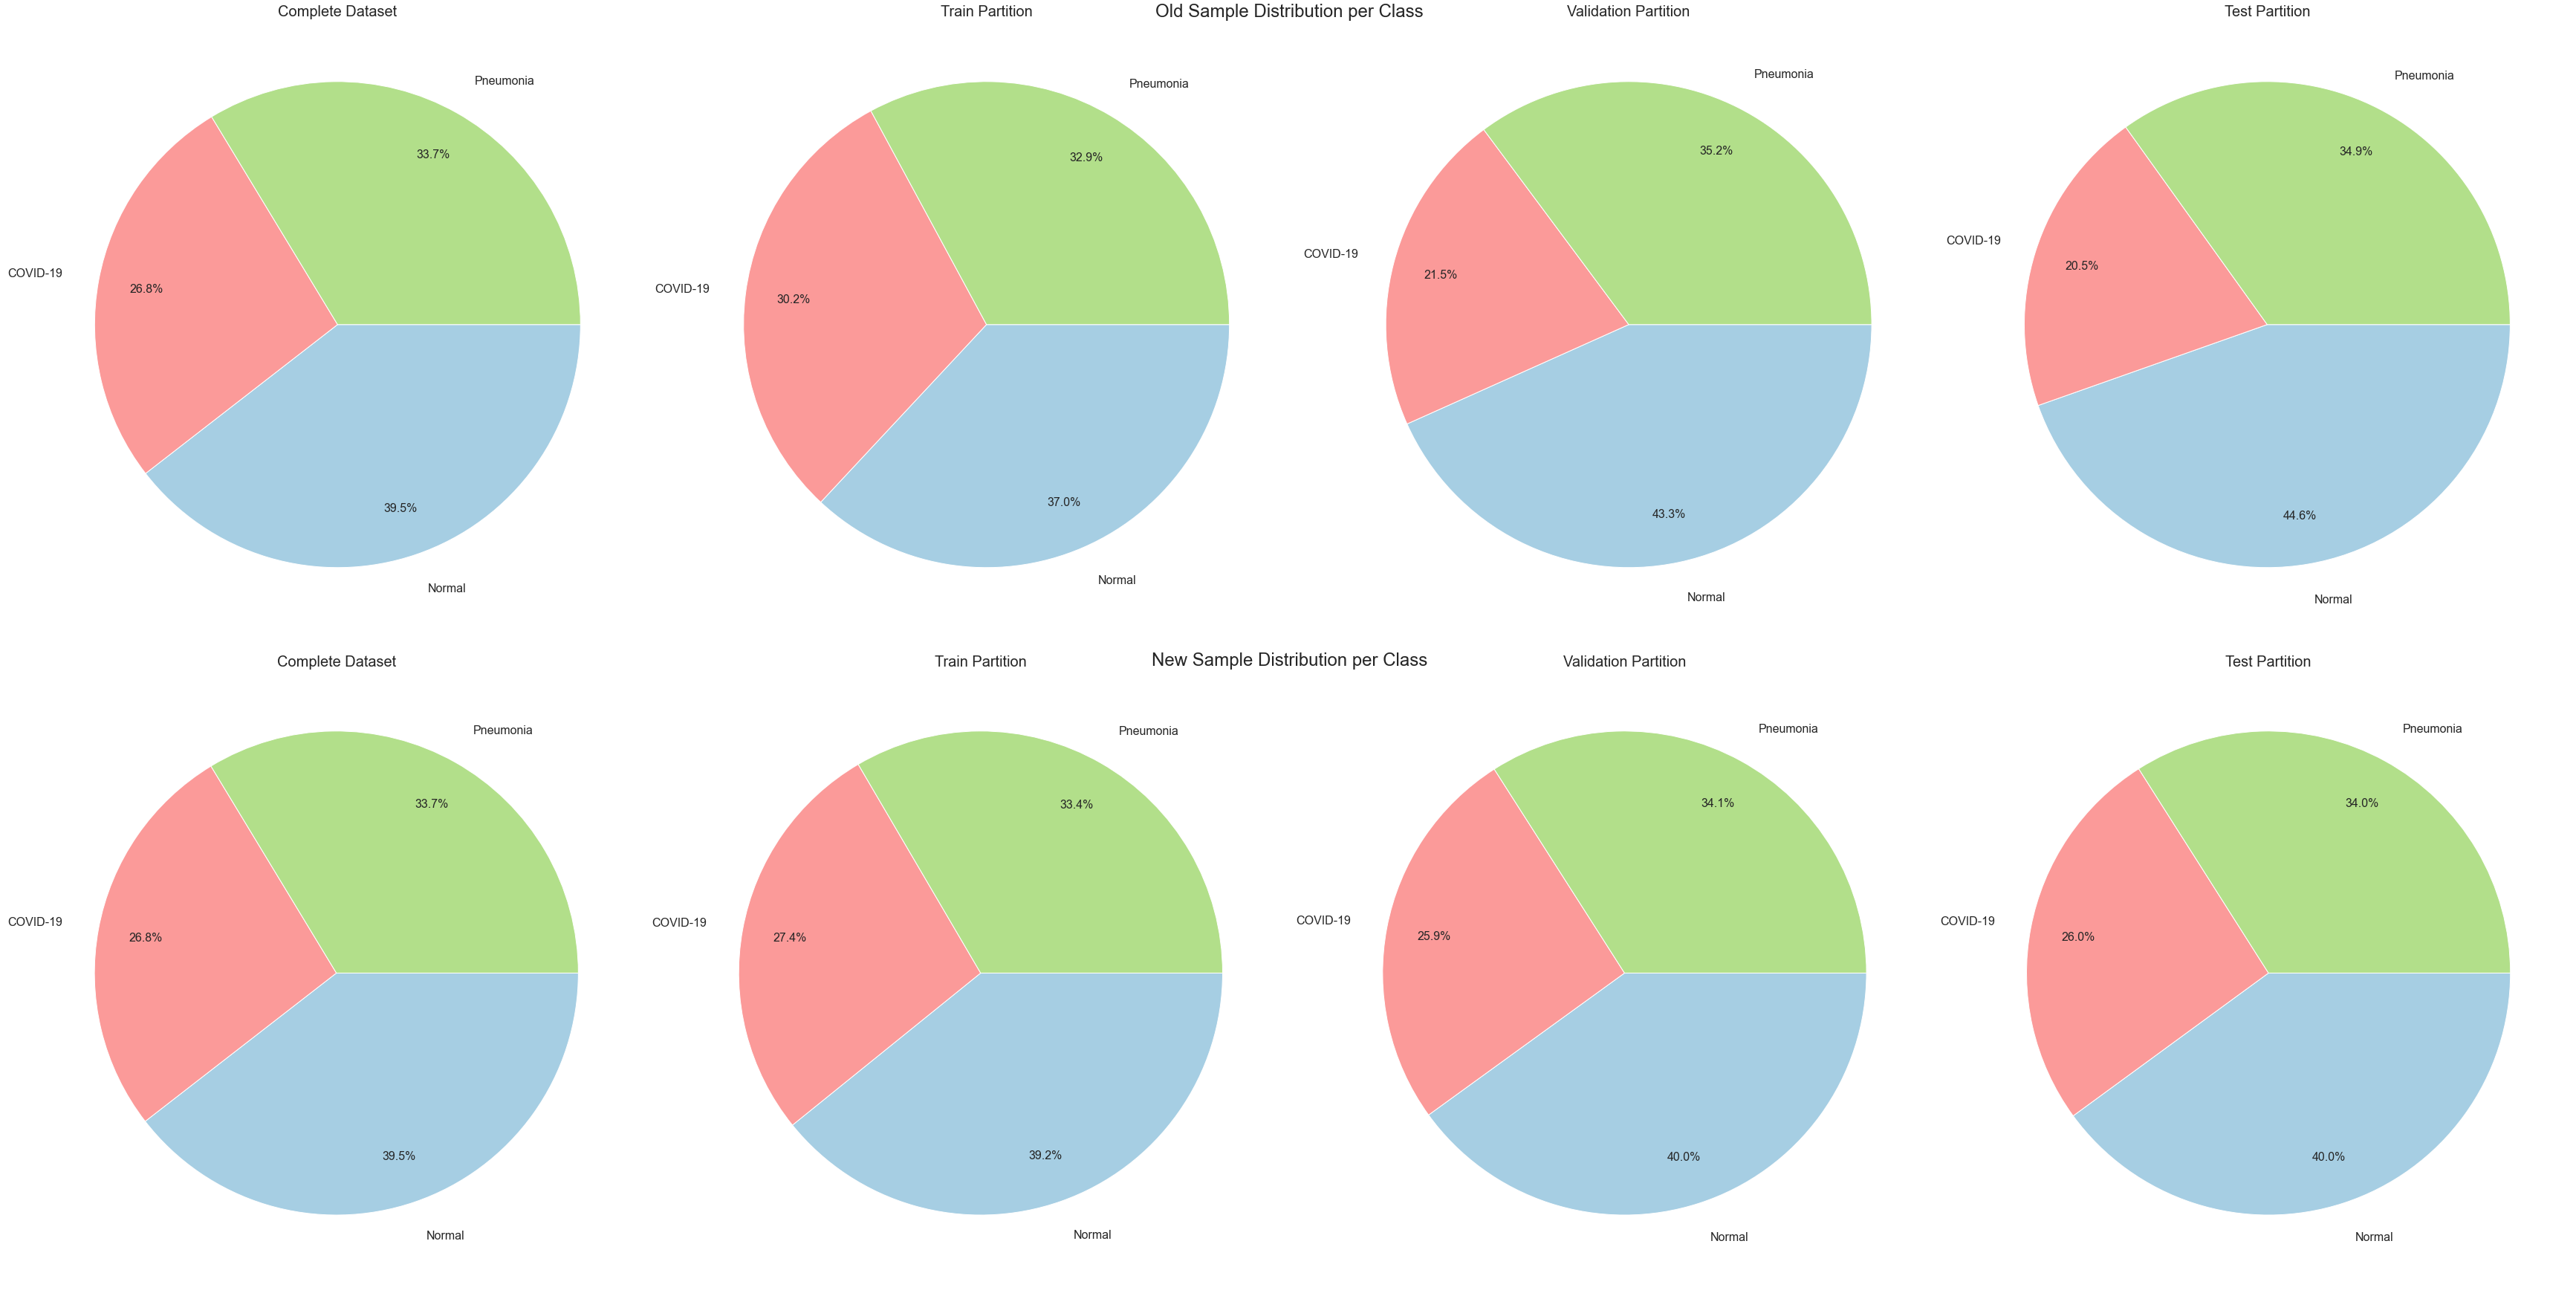

In [22]:
plot.column_as_pies( samples_df, new_samples_df, "class", dataset_name, figsize = (48, 24), resplit = True )

In [23]:
plot.column_as_table( samples_df, new_samples_df, "class", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 31070 
 22197 
 4528 
 4345 
 
 
 Normal 
 45758 
 27201 
 9107 
 9450 
 
 
 Pneumonia 
 39009 
 24214 
 7400 
 7395 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Normal 
 45758 
 27485 
 9139 
 9134 
 
 
 Pneumonia 
 39009 
 23459 
 7775 
 7775 
 
 
 COVID-19 
 31070 
 19198 
 5919 
 5953 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

## Age

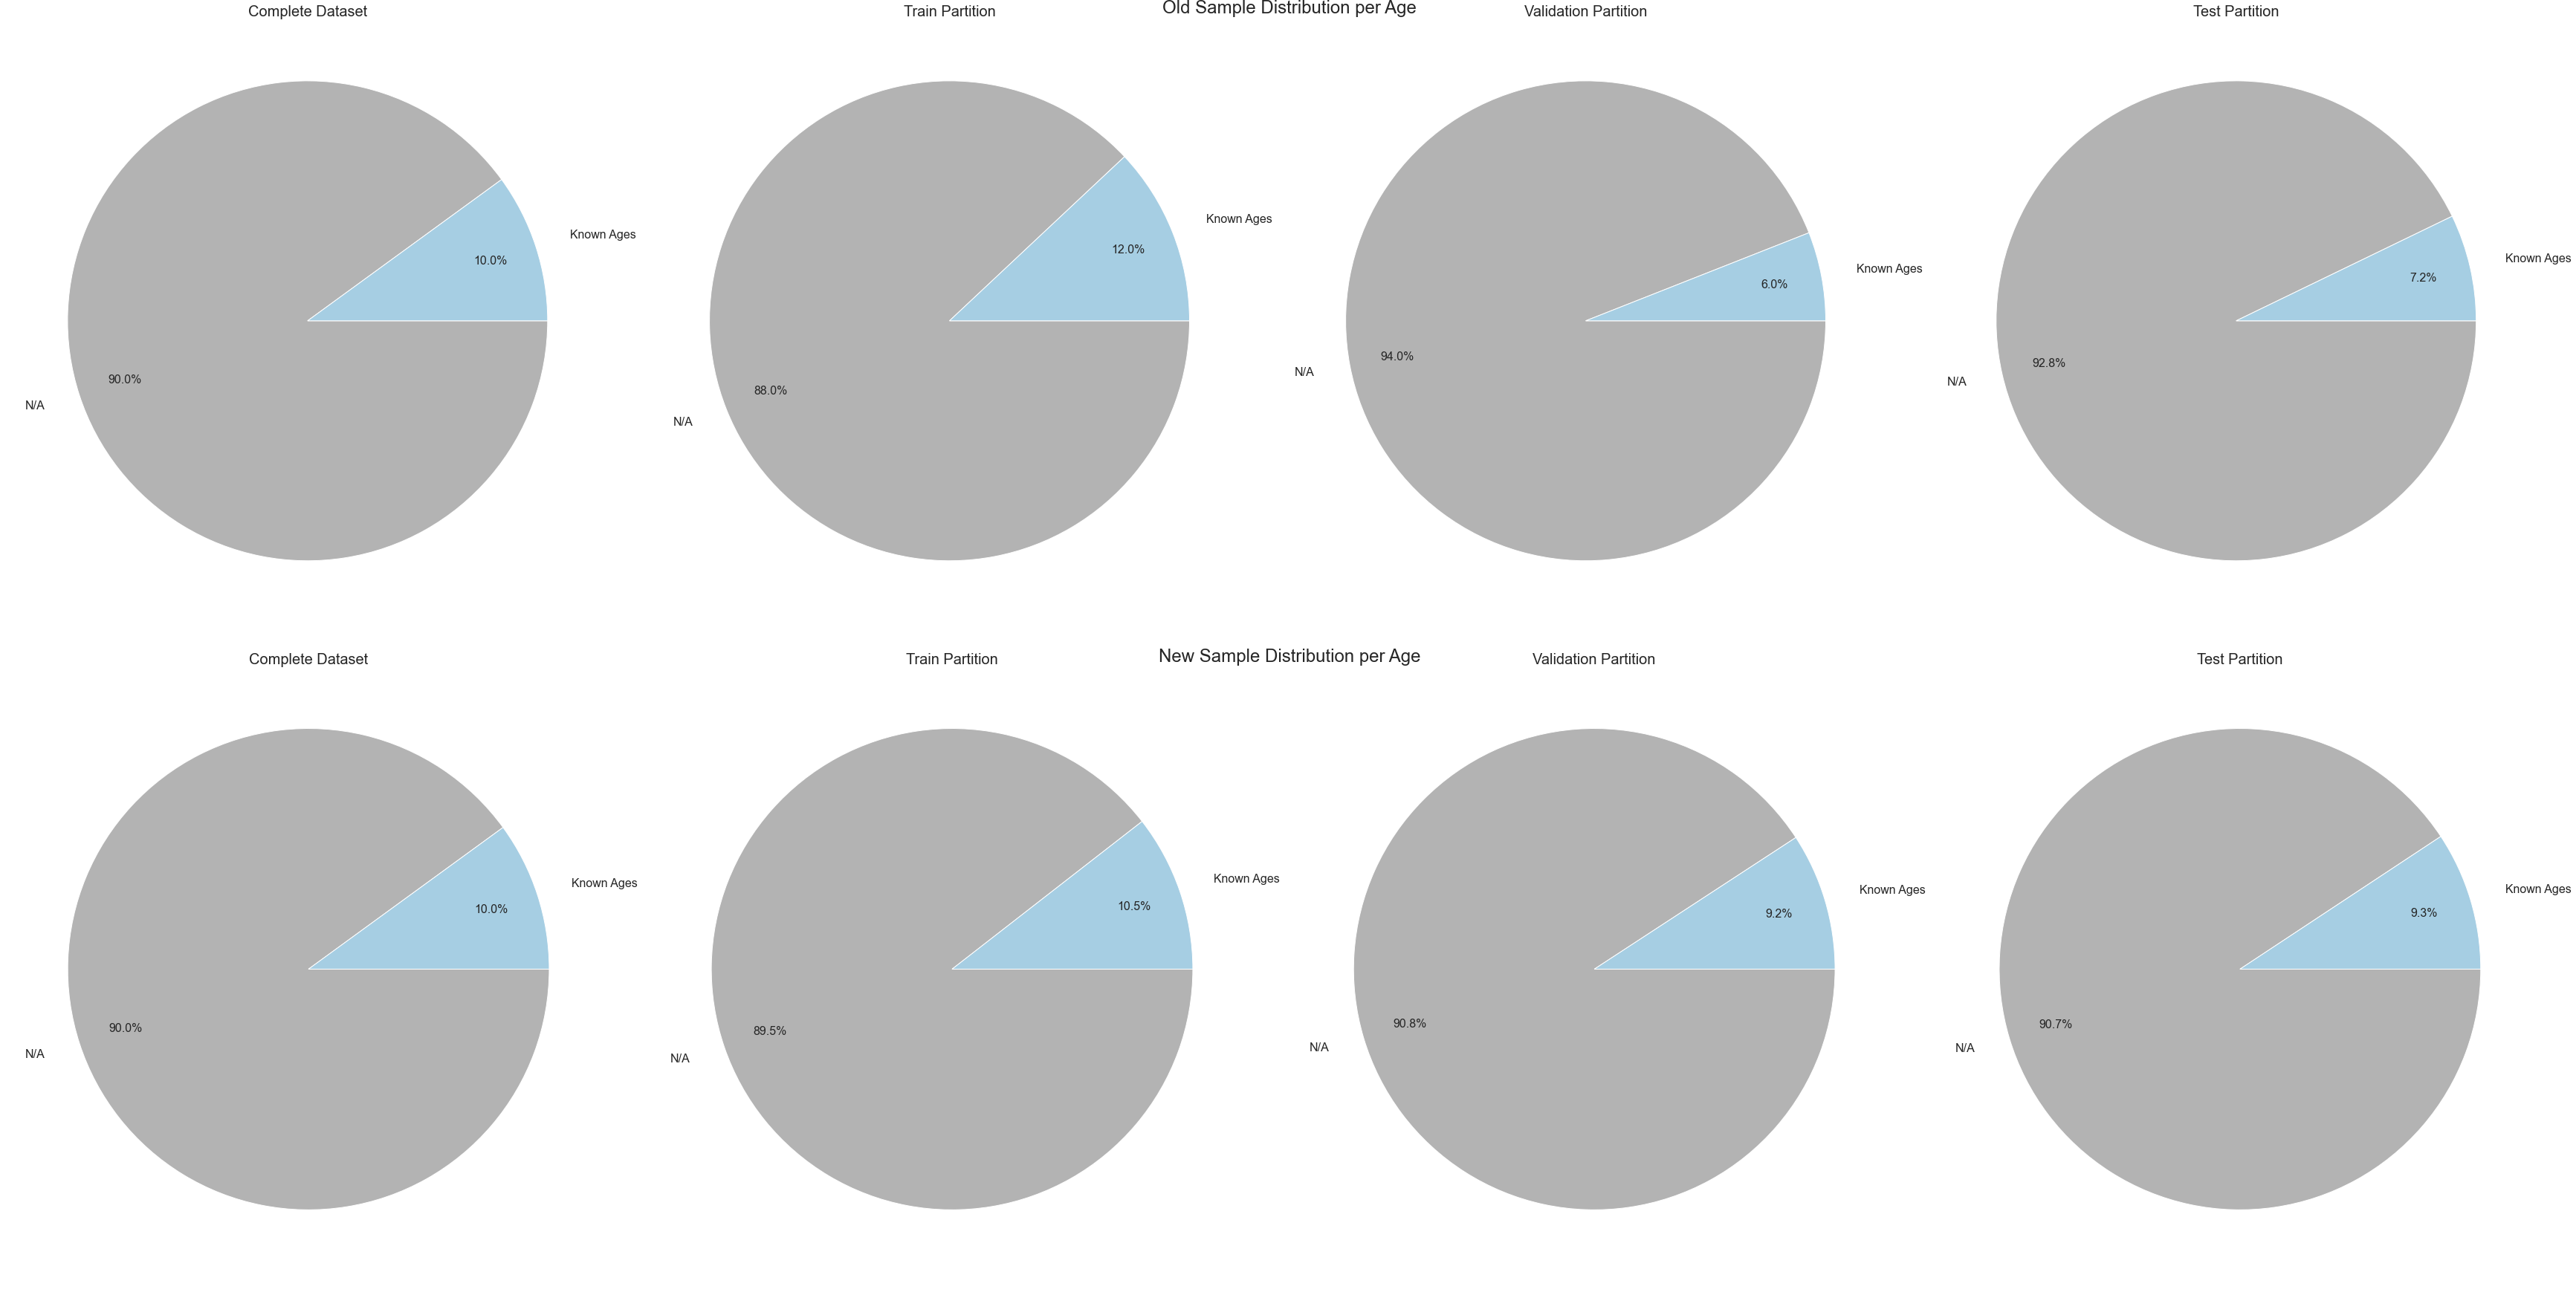

In [24]:
plot.column_as_pies( samples_df, new_samples_df, "age", dataset_name, figsize = (48, 24), resplit = True)

In [25]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 104230 
 64784 
 19777 
 19669 
 
 
 Known Ages 
 11607 
 8828 
 1258 
 1521 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 104230 
 62763 
 20730 
 20737 
 
 
 Known Ages 
 11607 
 7379 
 2103 
 2125 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

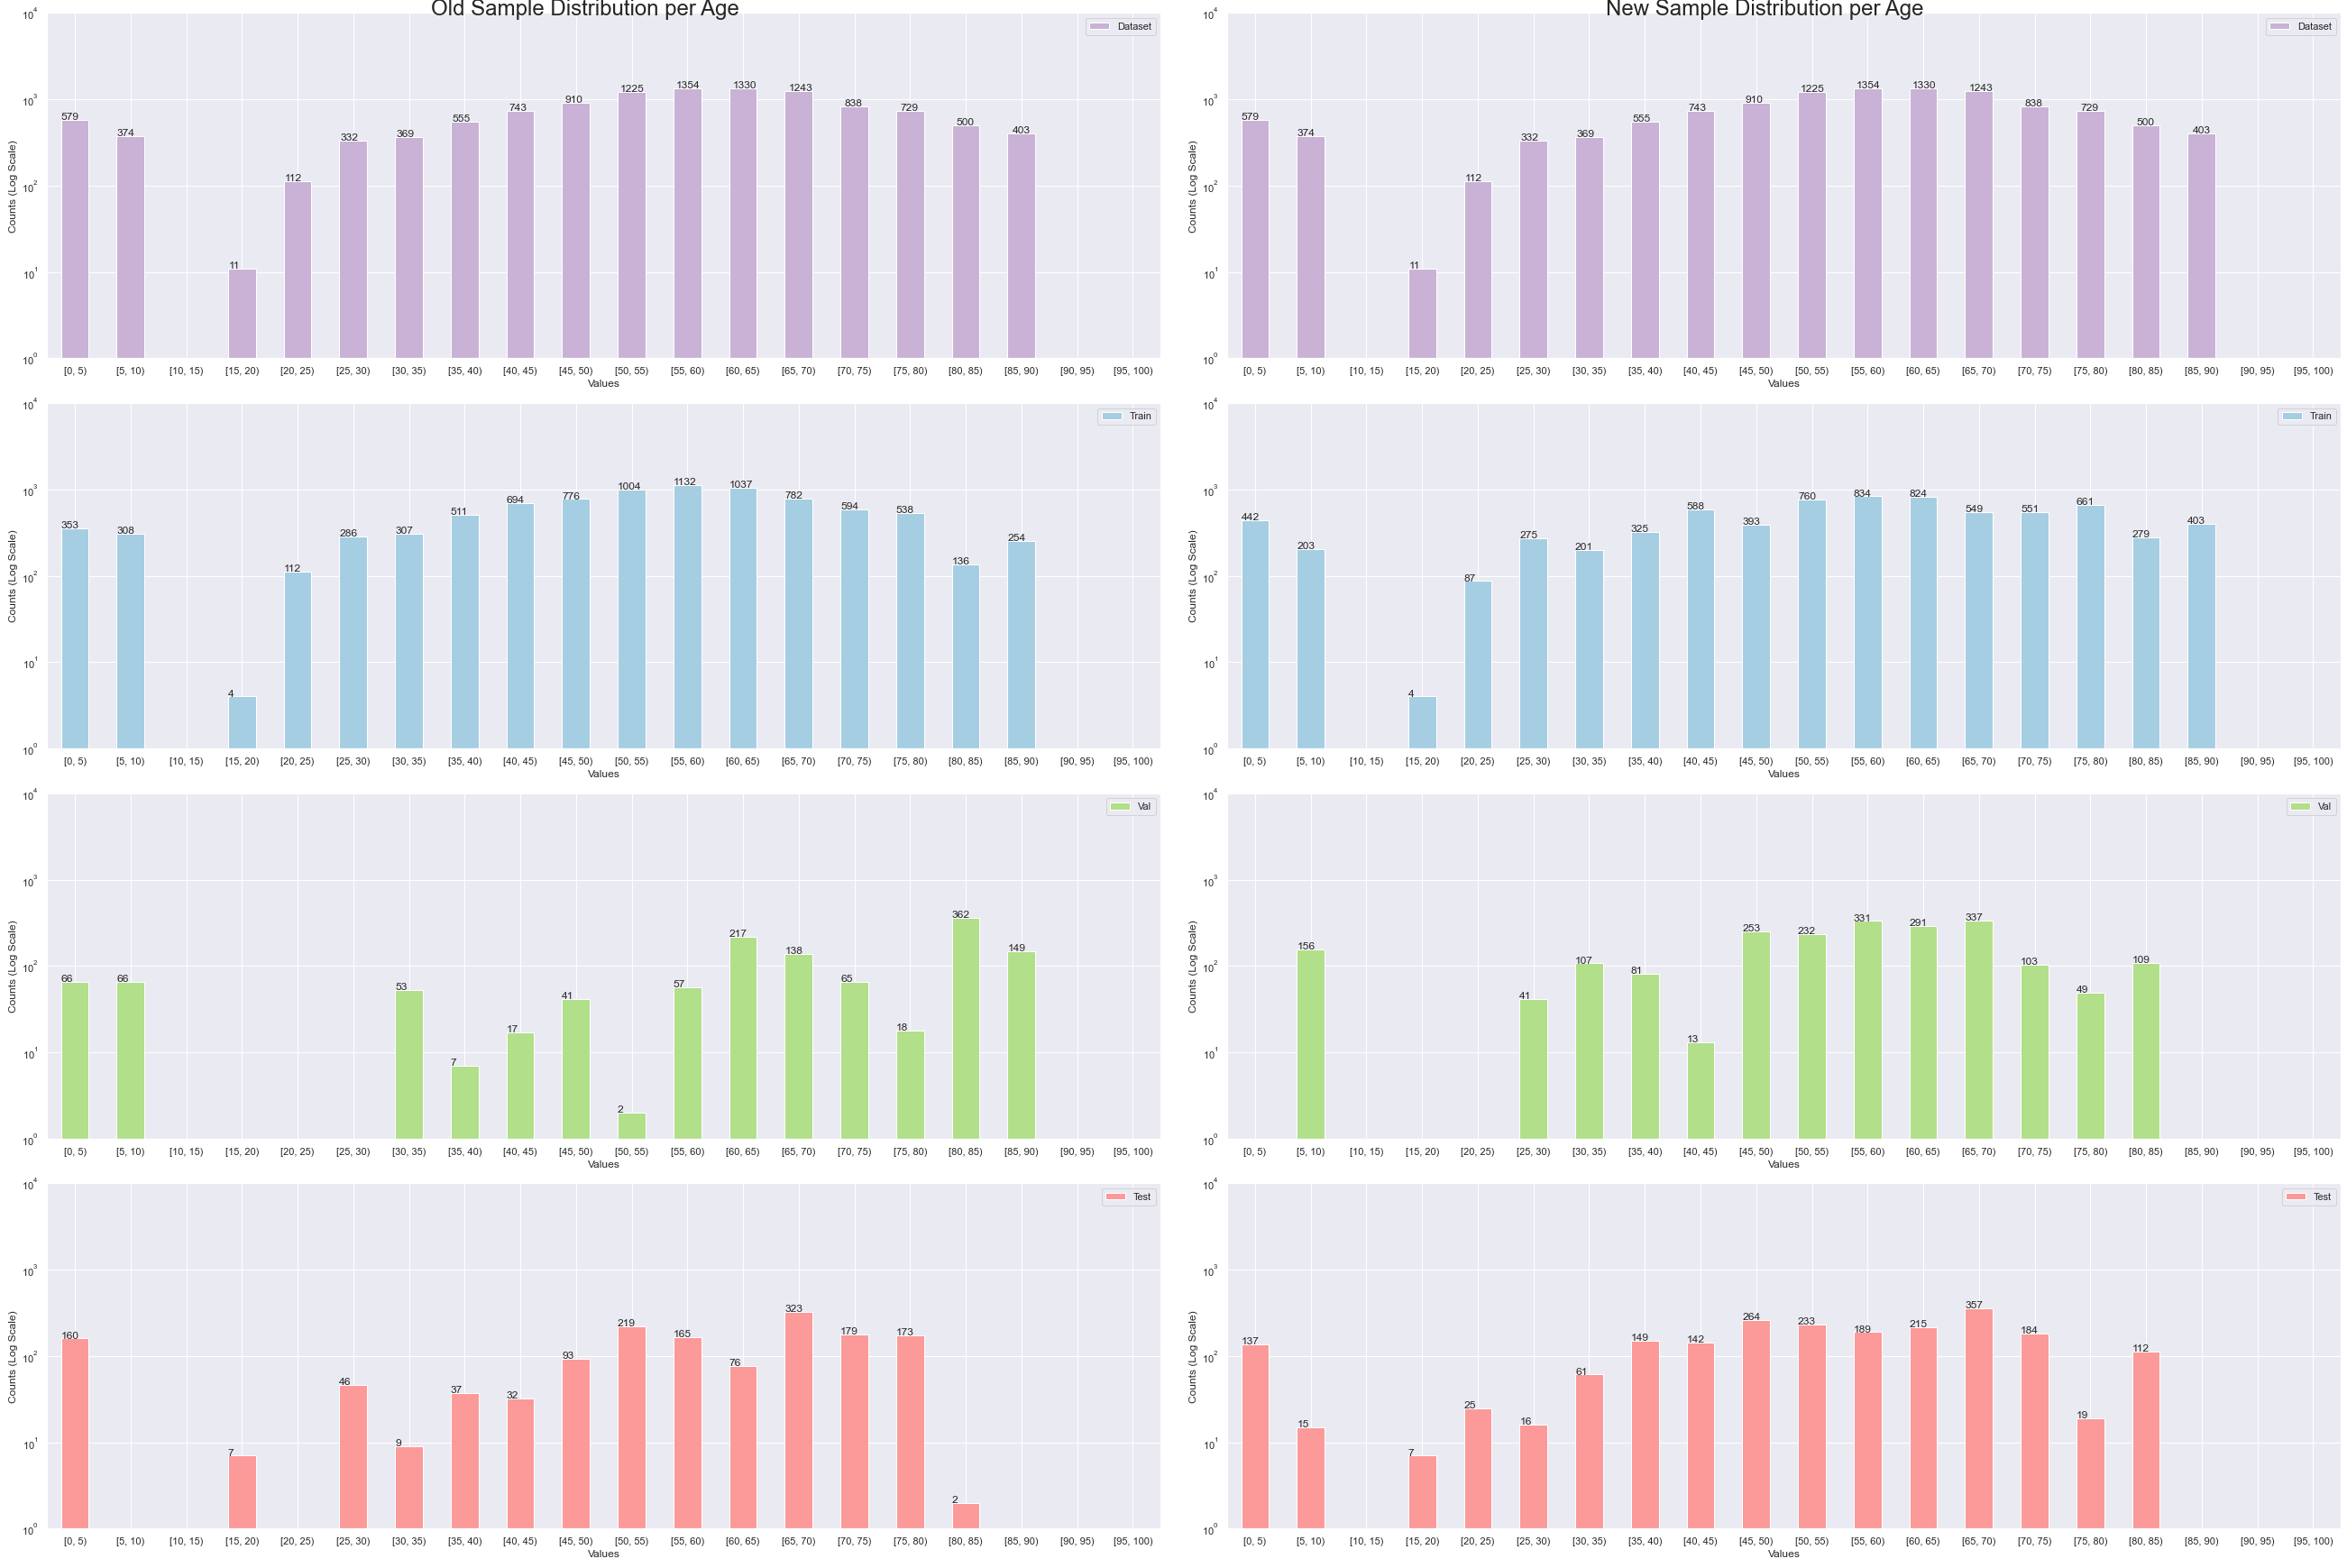

In [26]:
plot.column_as_histograms( samples_df, new_samples_df, "age", dataset_name, figsize = (36, 24), resplit = True)

In [27]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = True, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 579 
 353 
 66 
 160 
 
 
 [5, 10) 
 374 
 308 
 66 
 0 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 11 
 4 
 0 
 7 
 
 
 [20, 25) 
 112 
 112 
 0 
 0 
 
 
 [25, 30) 
 332 
 286 
 0 
 46 
 
 
 [30, 35) 
 369 
 307 
 53 
 9 
 
 
 [35, 40) 
 555 
 511 
 7 
 37 
 
 
 [40, 45) 
 743 
 694 
 17 
 32 
 
 
 [45, 50) 
 910 
 776 
 41 
 93 
 
 
 [50, 55) 
 1225 
 1004 
 2 
 219 
 
 
 [55, 60) 
 1354 
 1132 
 57 
 165 
 
 
 [60, 65) 
 1330 
 1037 
 217 
 76 
 
 
 [65, 70) 
 1243 
 782 
 138 
 323 
 
 
 [70, 75) 
 838 
 594 
 65 
 179 
 
 
 [75, 80) 
 729 
 538 
 18 
 173 
 
 
 [80, 85) 
 500 
 136 
 362 
 2 
 
 
 [85, 90) 
 403 
 254 
 149 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 11607 
 8828 
 1258 
 1521 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 579 
 442 
 0 
 137 
 
 
 [5, 10) 
 374 
 203 
 156 
 15 
 
 
 [10, 15) 
 0 
 0 
 0 
 0 
 
 
 [15, 20) 
 11 
 4 
 0 
 7 
 
 
 [20, 25) 
 112 
 87 
 0 
 25 
 
 
 [25, 30) 
 332 
 275 
 41 
 16 
 
 
 [30, 35) 
 369 
 201 
 107 
 61 
 
 
 [35, 40) 
 555 
 325 
 81 
 149 
 
 
 [40, 45) 
 743 
 588 
 13 
 142 
 
 
 [45, 50) 
 910 
 393 
 253 
 264 
 
 
 [50, 55) 
 1225 
 760 
 232 
 233 
 
 
 [55, 60) 
 1354 
 834 
 331 
 189 
 
 
 [60, 65) 
 1330 
 824 
 291 
 215 
 
 
 [65, 70) 
 1243 
 549 
 337 
 357 
 
 
 [70, 75) 
 838 
 551 
 103 
 184 
 
 
 [75, 80) 
 729 
 661 
 49 
 19 
 
 
 [80, 85) 
 500 
 279 
 109 
 112 
 
 
 [85, 90) 
 403 
 403 
 0 
 0 
 
 
 [90, 95) 
 0 
 0 
 0 
 0 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 11607 
 7379 
 2103 
 2125

## Sex

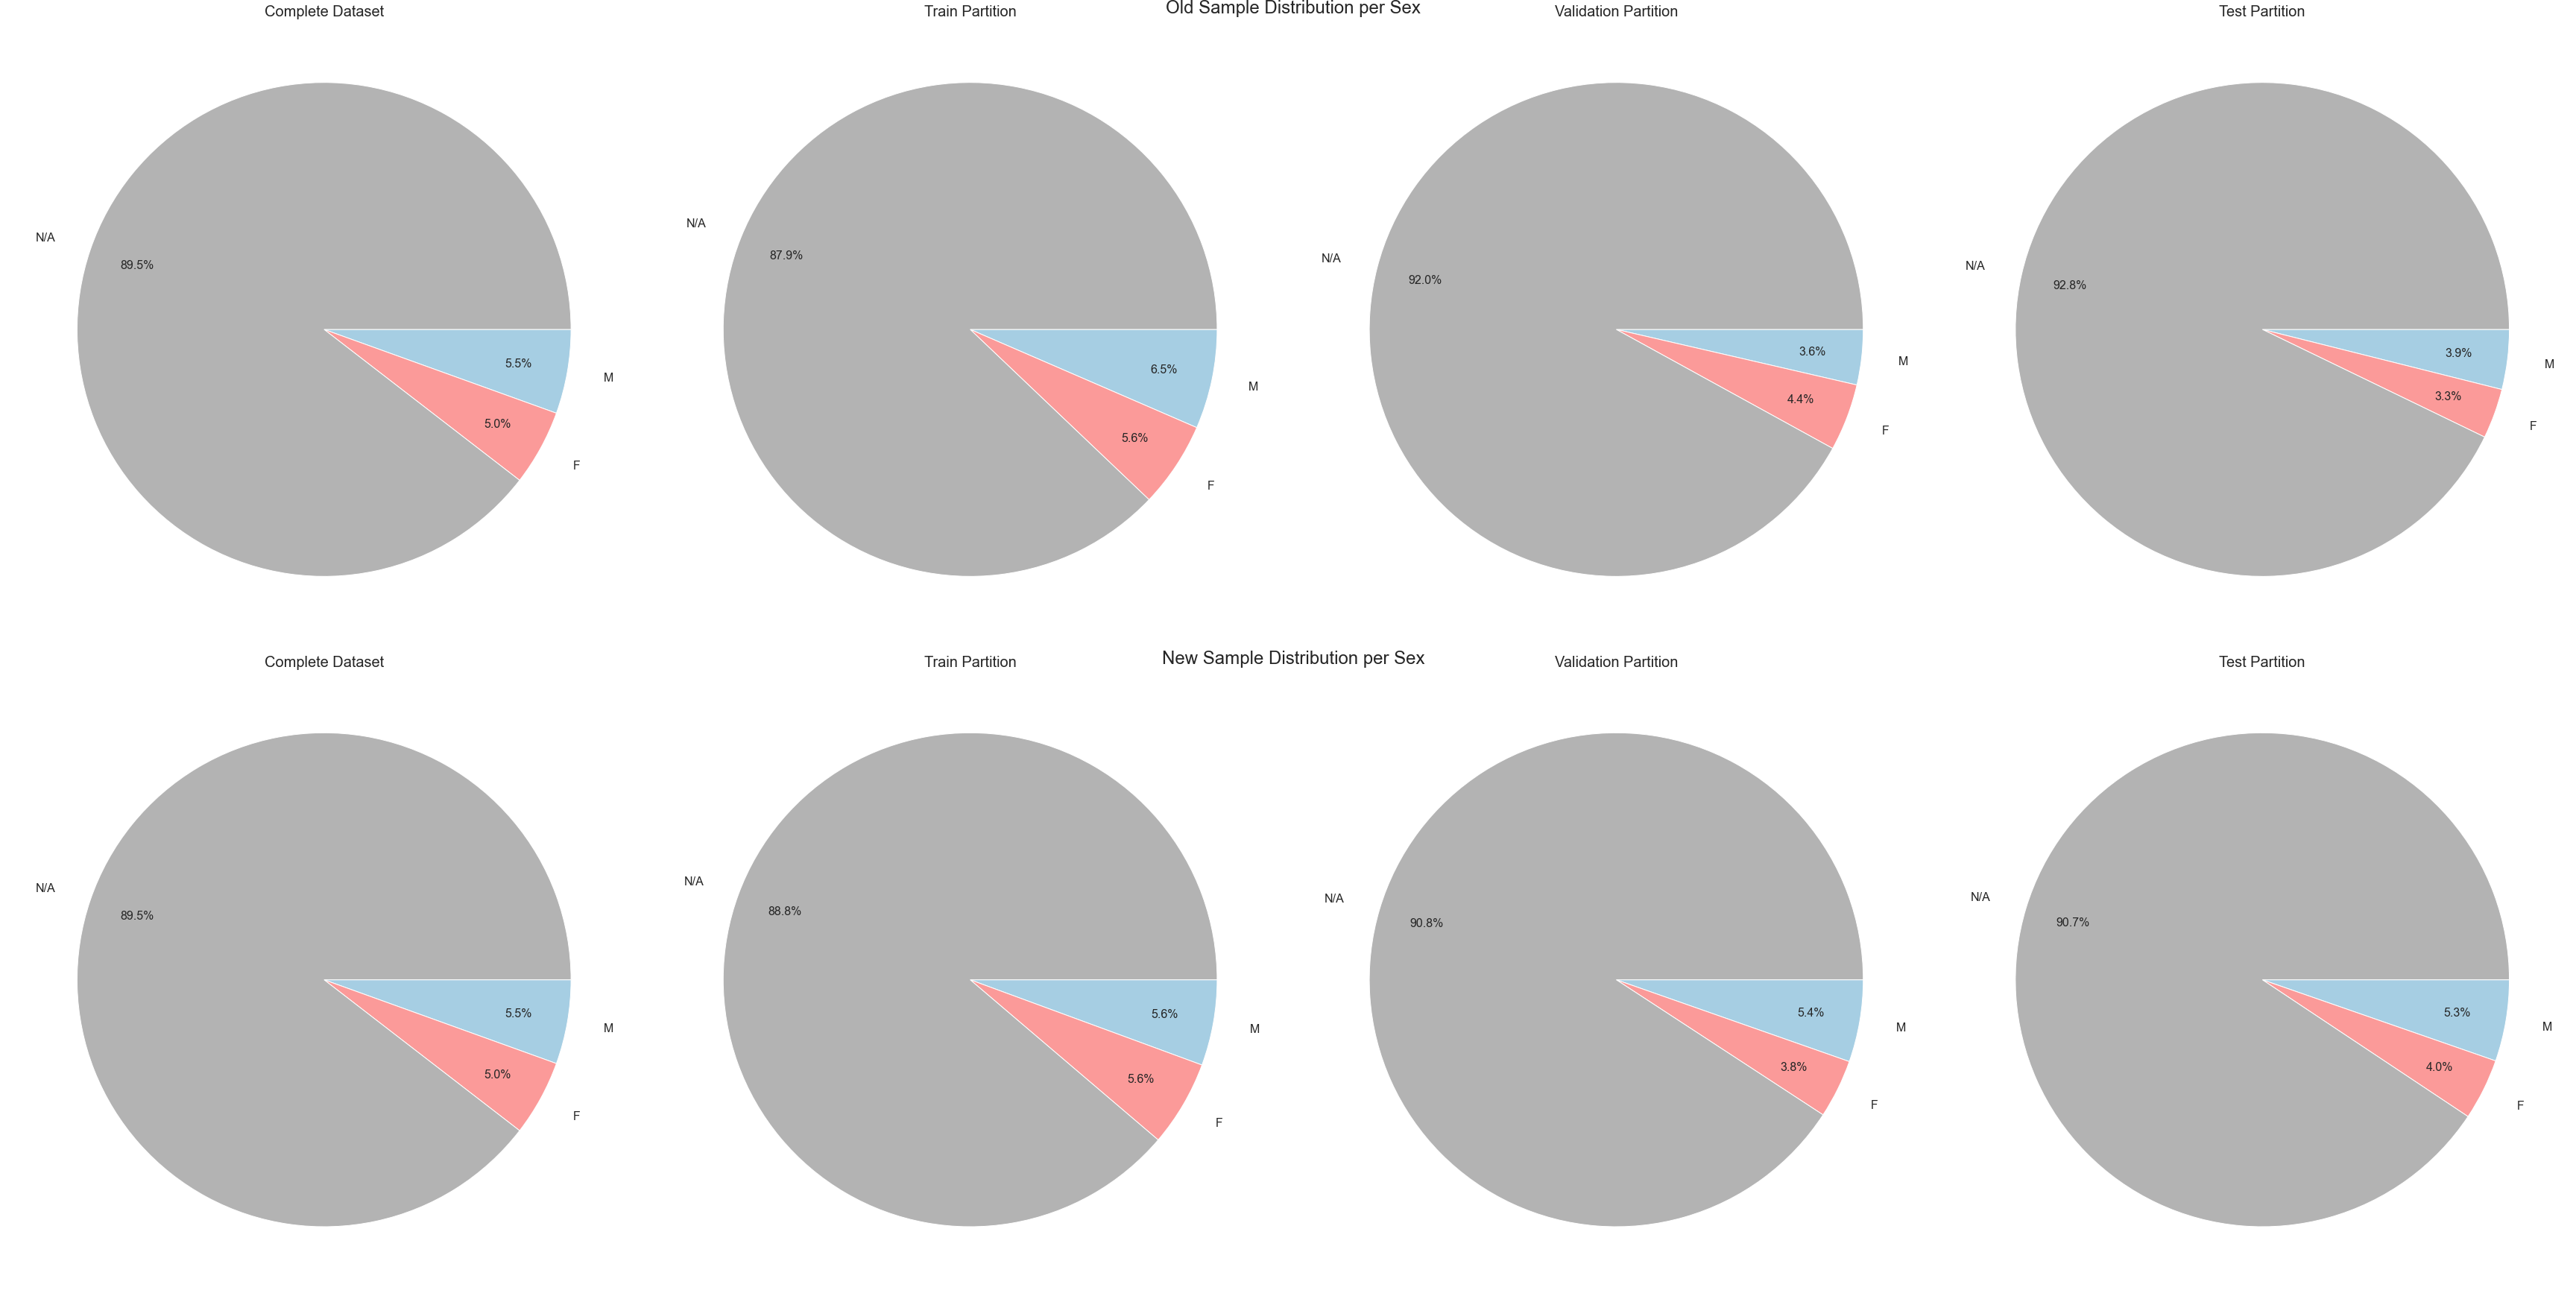

In [28]:
plot.column_as_pies( samples_df, new_samples_df, "sex", dataset_name, figsize = (48, 24), resplit = True )

In [29]:
plot.column_as_table( samples_df, new_samples_df, "sex", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 6380 
 4791 
 760 
 829 
 
 
 N/A 
 103720 
 64699 
 19352 
 19669 
 
 
 F 
 5737 
 4122 
 923 
 692 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 103720 
 62264 
 20730 
 20726 
 
 
 M 
 6380 
 3935 
 1227 
 1218 
 
 
 F 
 5737 
 3943 
 876 
 918 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

## Country

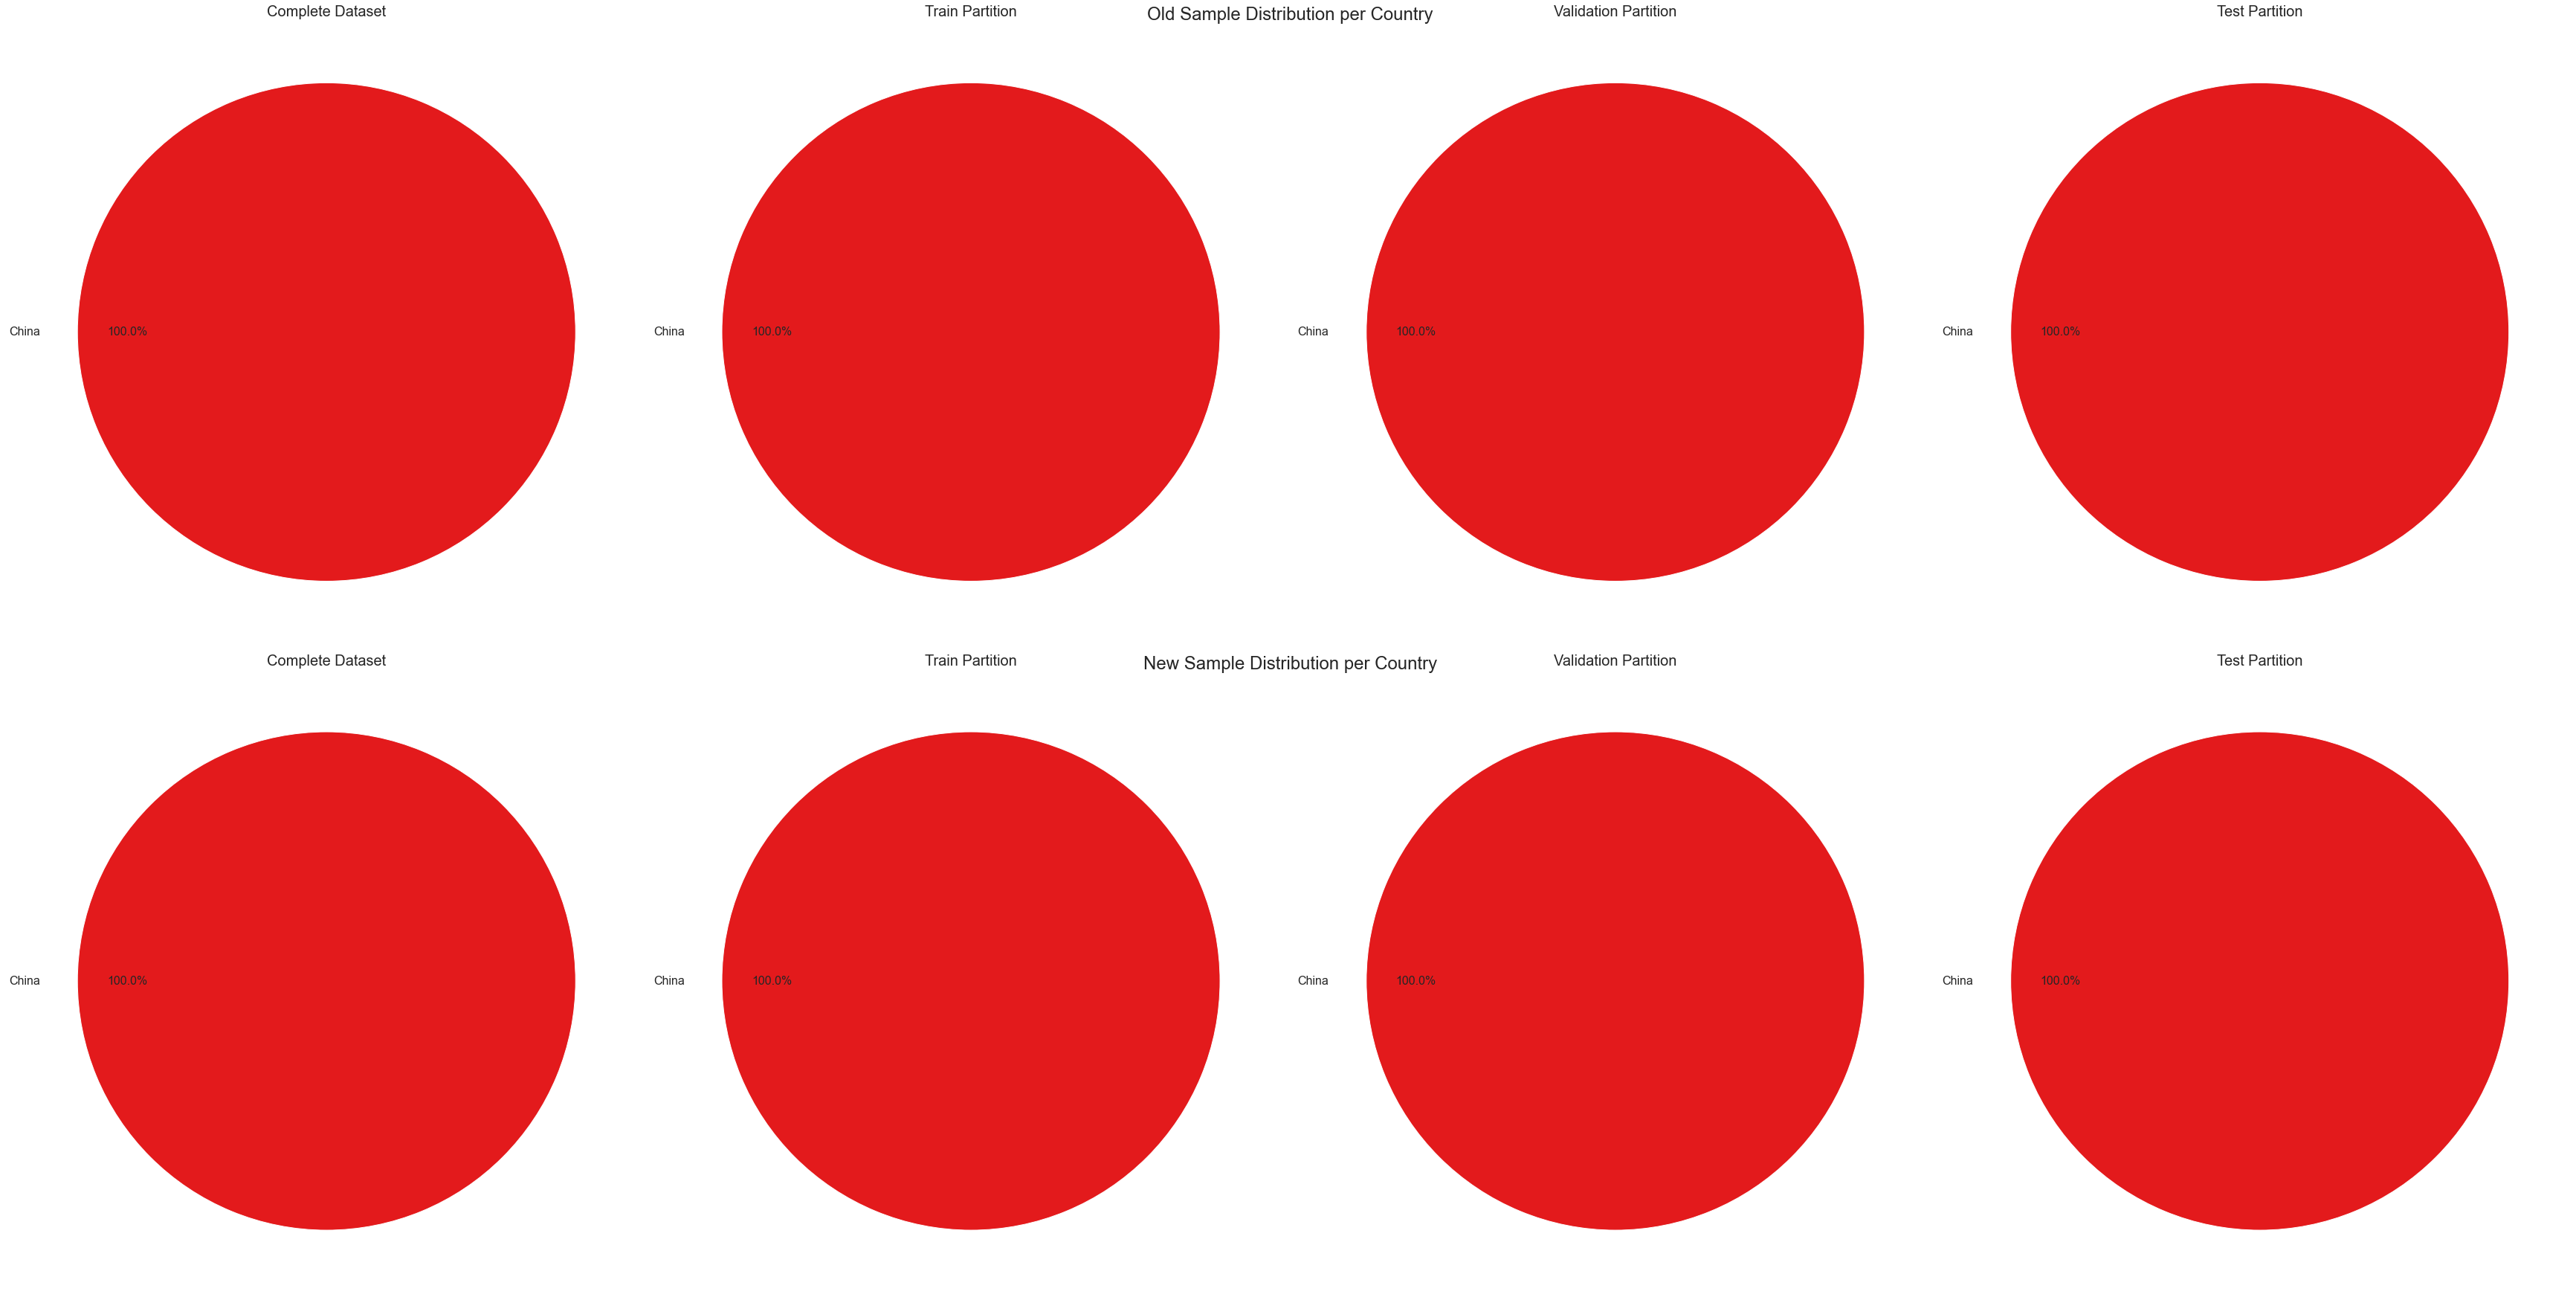

In [30]:
plot.column_as_pies( samples_df, new_samples_df, "country", dataset_name, figsize = (48, 24), resplit = True )

In [31]:
plot.column_as_table( samples_df, new_samples_df, "country", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 115837 
 73612 
 21035 
 21190 
 
 
 Iran 
 0 
 0 
 0 
 0 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 115837 
 70142 
 22833 
 22862 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

## Partition

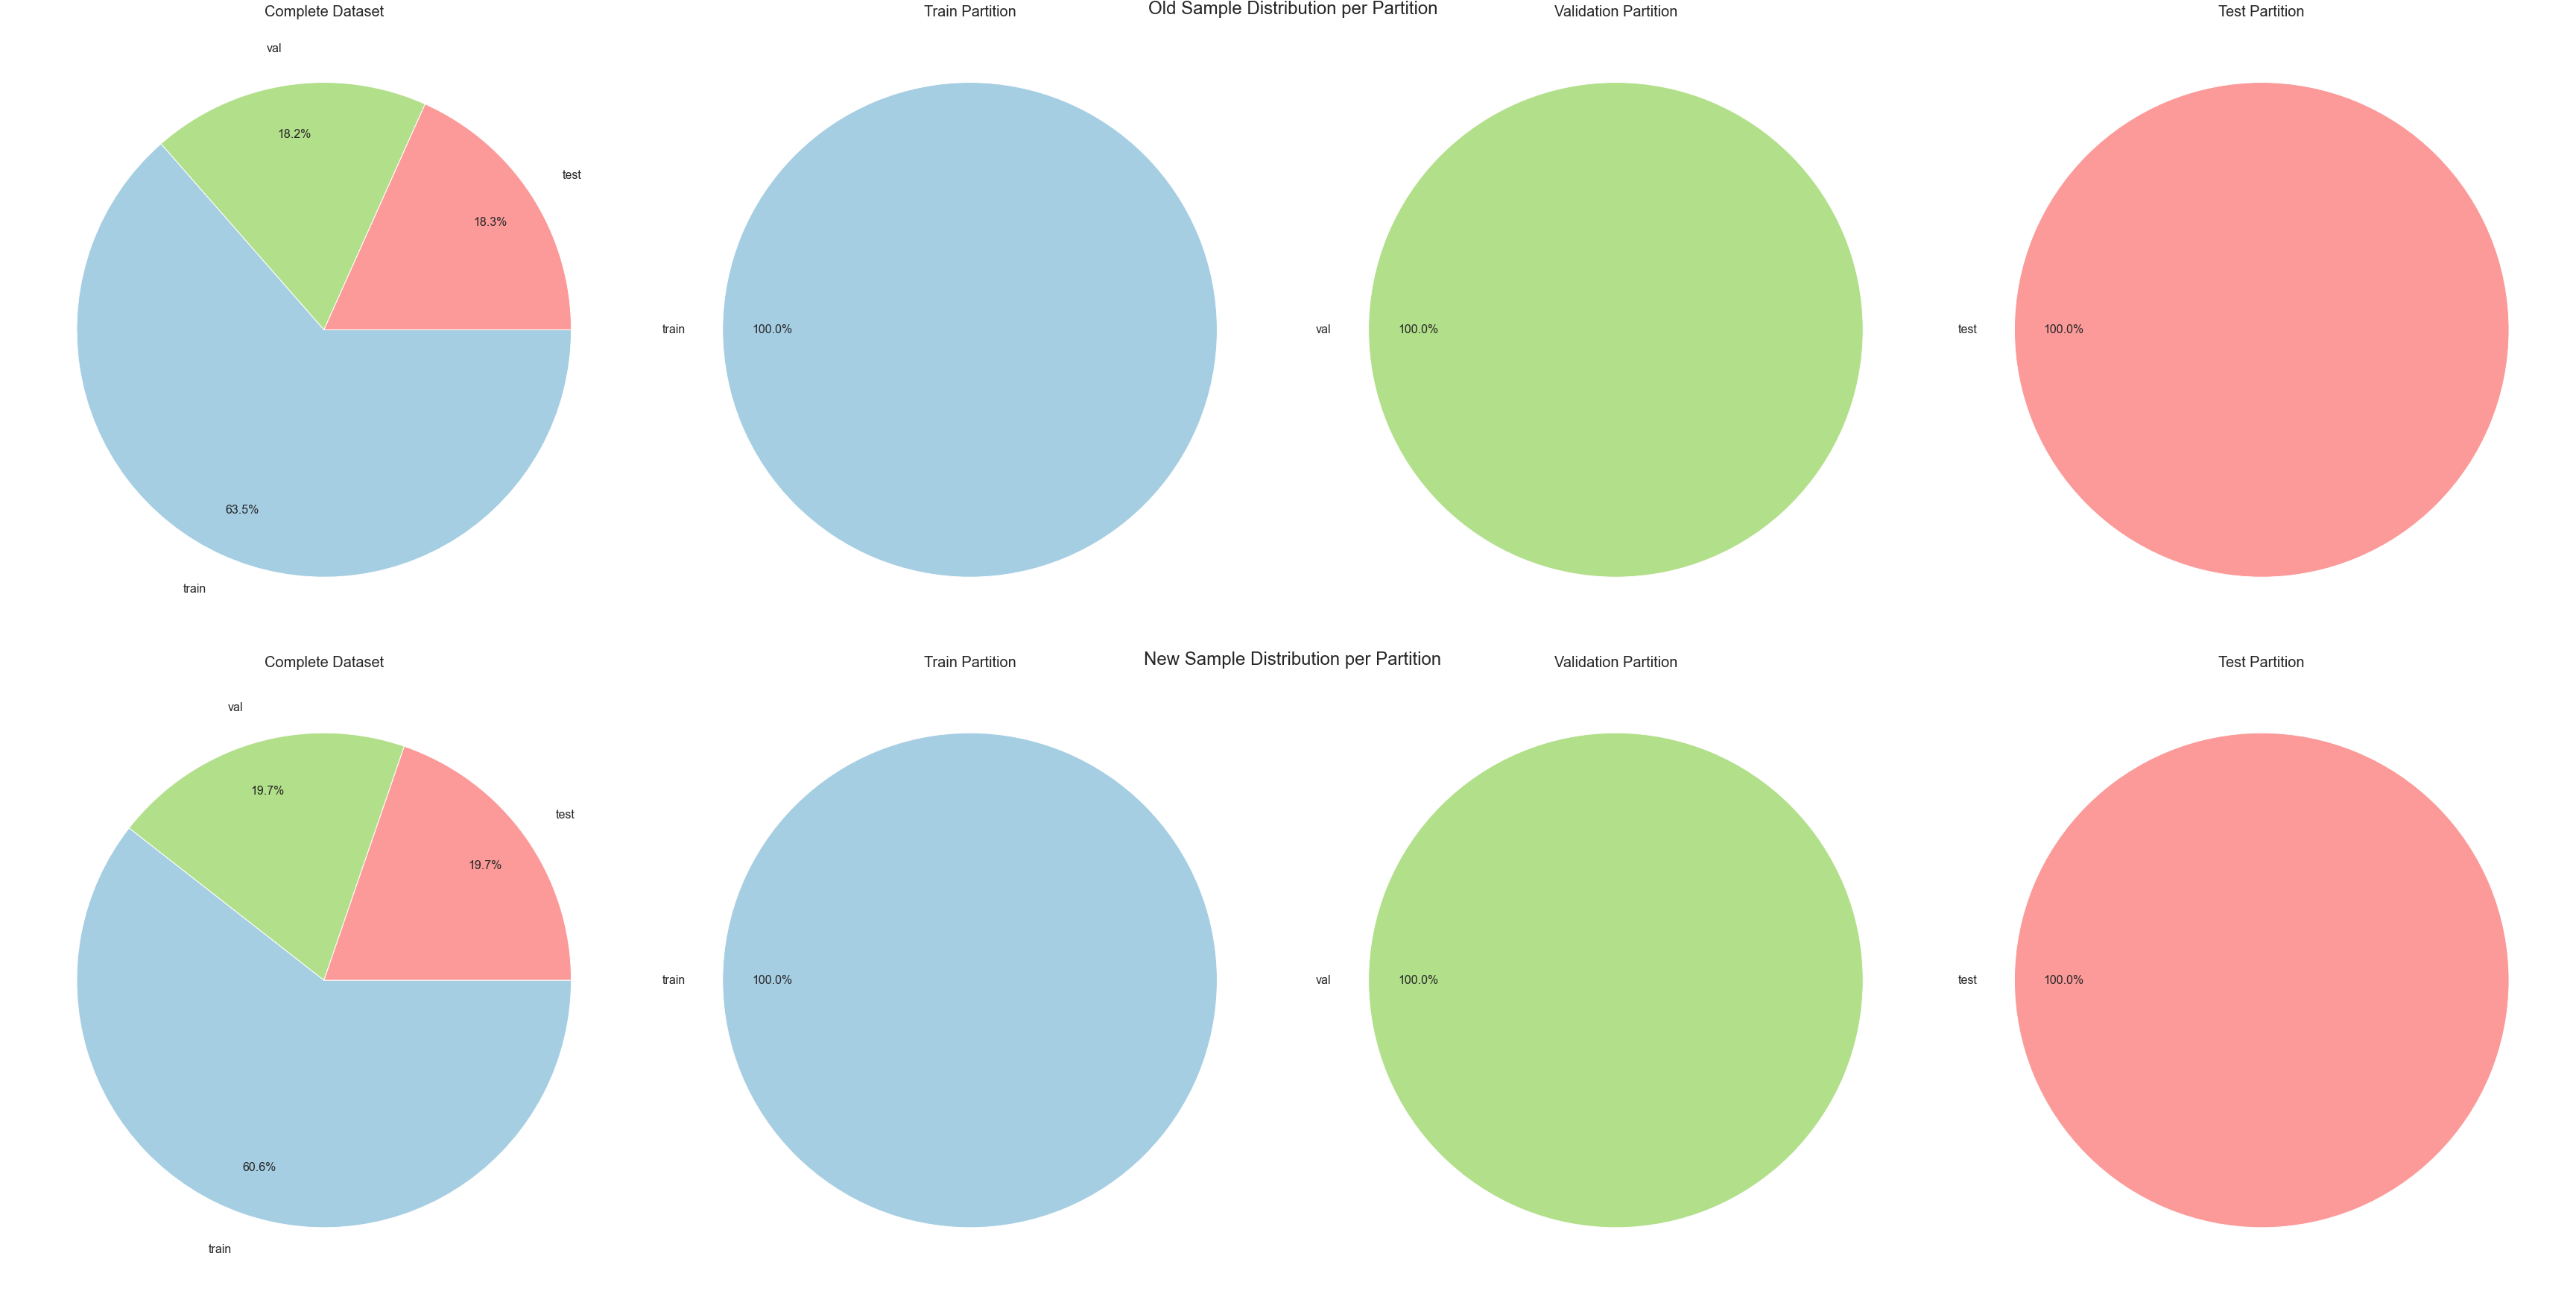

In [32]:
plot.column_as_pies( samples_df, new_samples_df, "partition", dataset_name, figsize = (48, 24), resplit = True )

In [33]:
plot.column_as_table( samples_df, new_samples_df, "partition", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 73612 
 73612 
 0 
 0 
 
 
 test 
 21190 
 0 
 0 
 21190 
 
 
 val 
 21035 
 0 
 21035 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 70142 
 70142 
 0 
 0 
 
 
 test 
 22862 
 0 
 0 
 22862 
 
 
 val 
 22833 
 0 
 22833 
 0 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

## Slice Selection

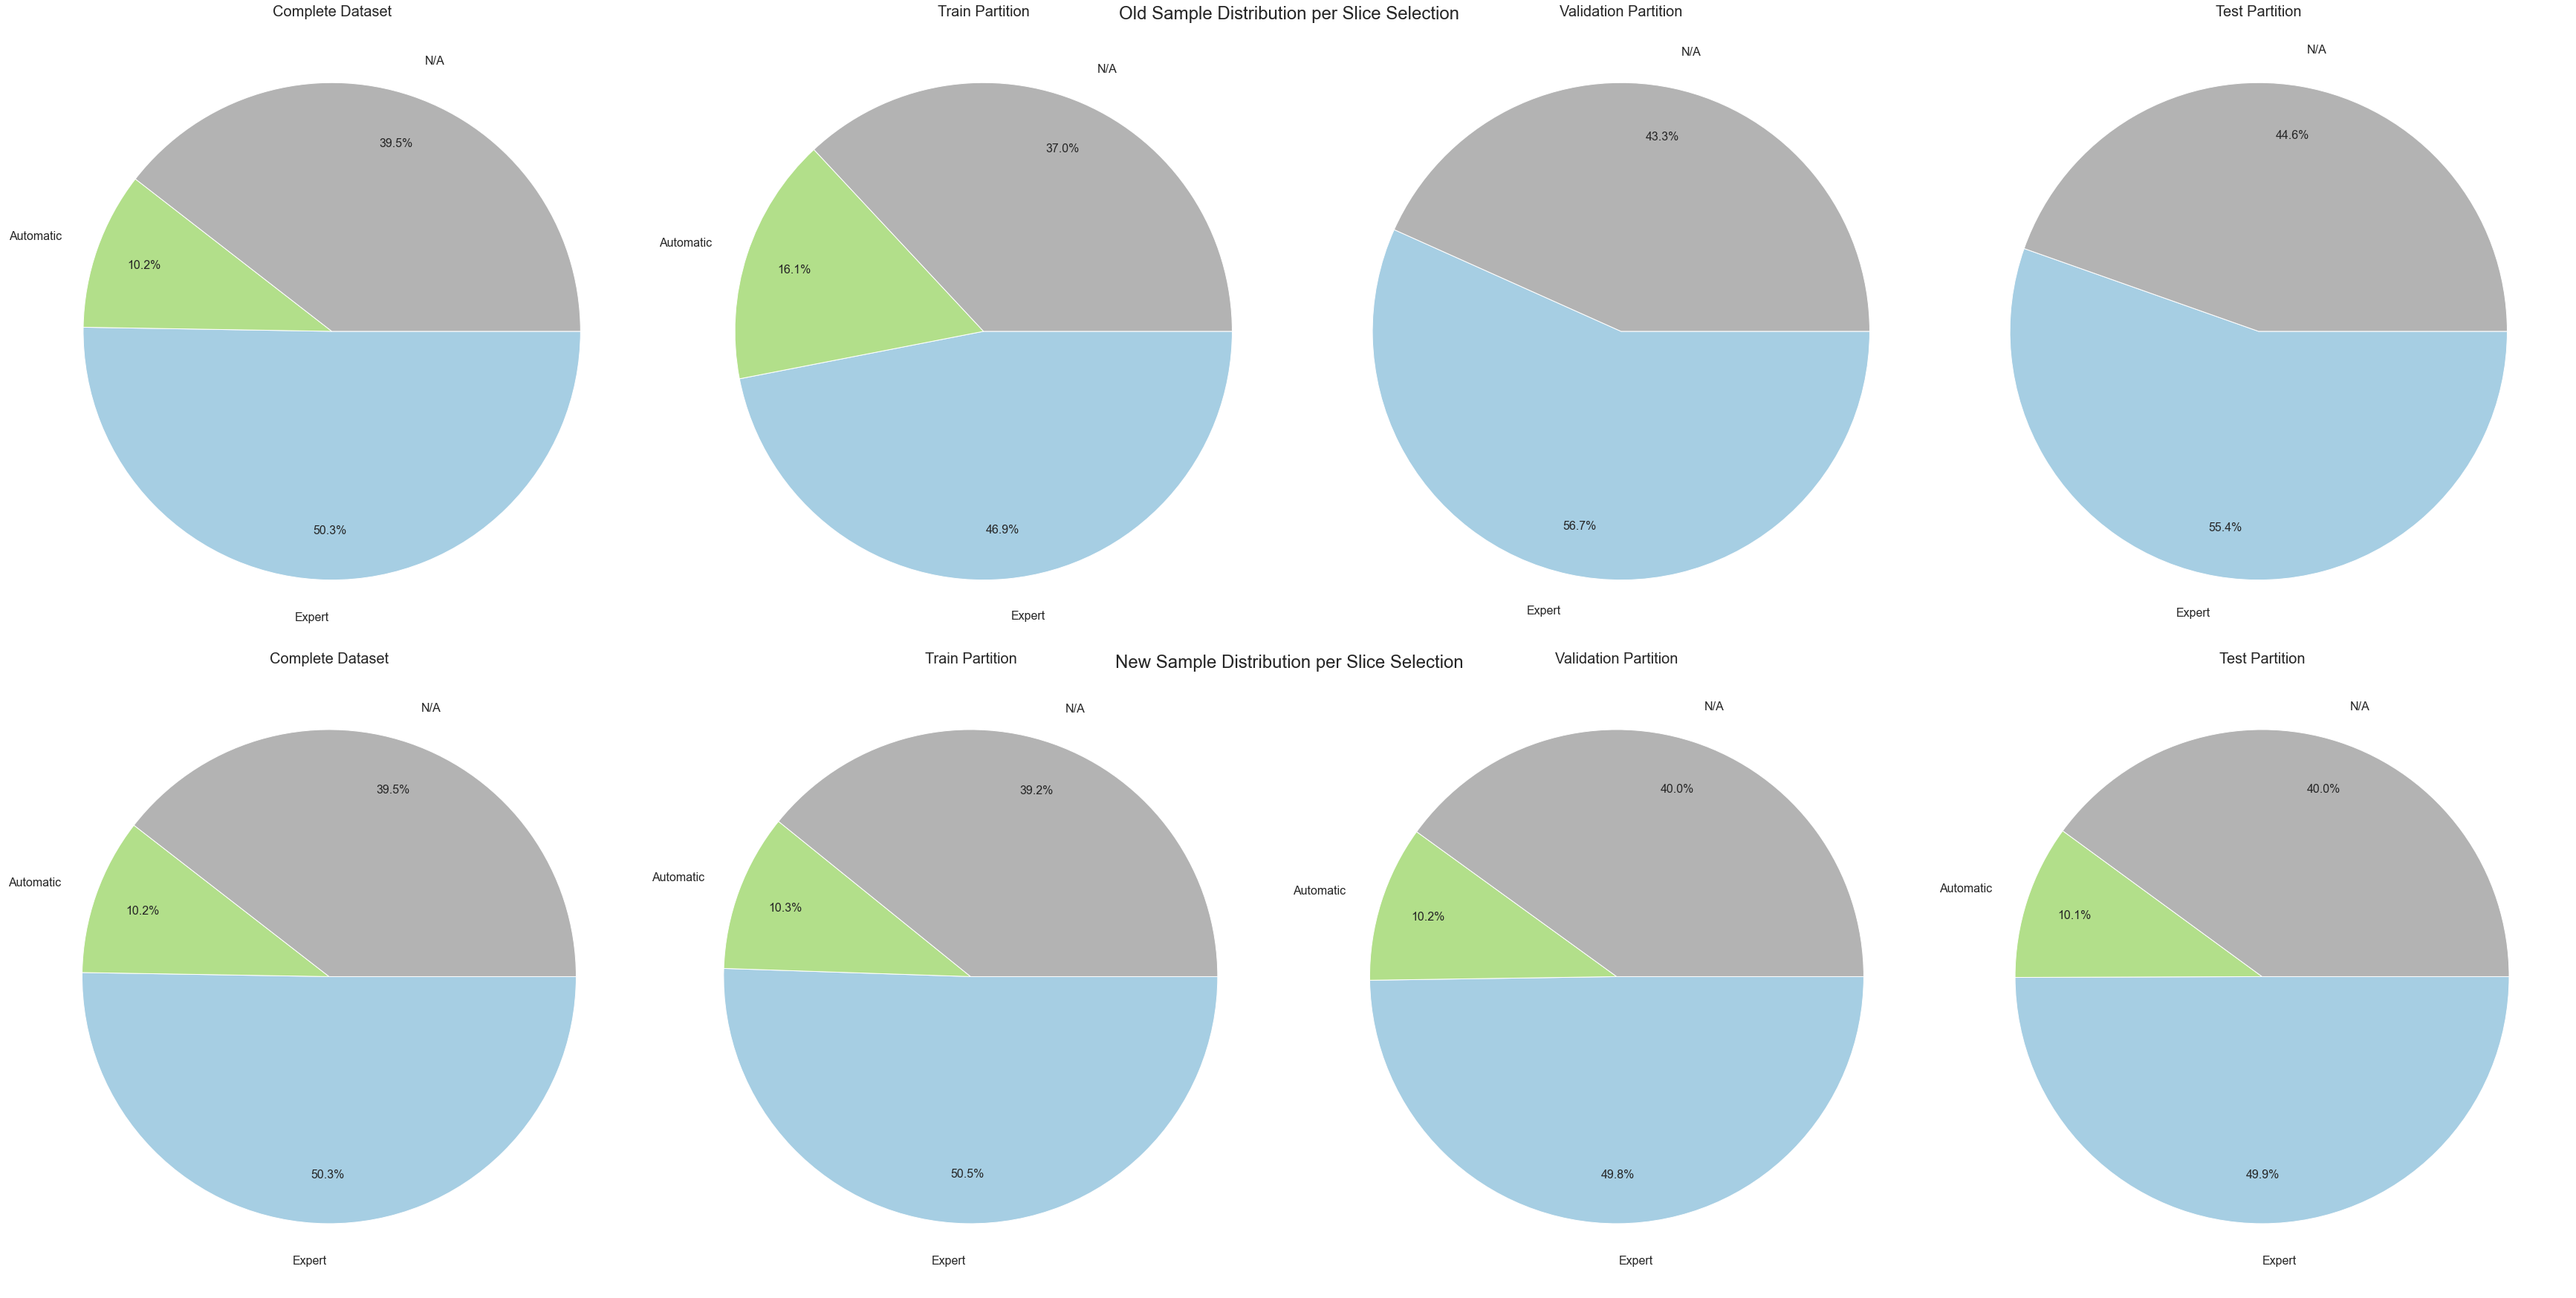

In [34]:
plot.column_as_pies( samples_df, new_samples_df, "slice_selection", dataset_name, figsize = (48, 24), resplit = True )

In [35]:
plot.column_as_table( samples_df, new_samples_df, "slice_selection", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 11856 
 11856 
 0 
 0 
 
 
 Expert 
 58223 
 34555 
 11928 
 11740 
 
 
 N/A 
 45758 
 27201 
 9107 
 9450 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 115837 
 73612 
 21035 
 21190 
 
 
 New Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Expert 
 58223 
 35441 
 11363 
 11419 
 
 
 N/A 
 45758 
 27485 
 9139 
 9134 
 
 
 Automatic 
 11856 
 7216 
 2331 
 2309 
 
 
 SUM 
 115837 
 70142 
 22833 
 22862

# Registering Changes

In [36]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, new_samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(new_samples_df) )
updated_df.head()

115837 115837


filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT